### Speedup

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted speedup values from the bar chart image
datasets = ['SED', 'Genesis', 'UcNe', 'ECG', 'MGAB', 'Sensorscope', 'MITDB', 'Daphnet', 'IOPS']
iforest = [6.1, 1.3, 3.5, 9.4, 5.4, 1.2, 16.0, 1.6, 3.0]
lof = [104, 1.8, 62.9, 924, 28.0, 1.5, 362, 2.4, 4.4]
sand = [2.8, 2.0, 2.8, 7.8, 1.9, 1.2, 13.1, 2.8, 2.5]

# Compute average speedup for each method
avg_iforest = np.mean(iforest)
avg_lof = np.mean(lof)
avg_sand = np.mean(sand)

avg_iforest, avg_lof, avg_sand


(5.277777777777778, 165.66666666666666, 4.1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extracted speedup values from the bar chart image
datasets = ['SED', 'Genesis', 'UcNe', 'ECG', 'MGAB', 'Sensorscope', 'MITDB', 'Daphnet', 'IOPS']
iforest_roc = np.array([80.8, 66.4, 75.3, 68.0, 57.1, 56.4, 60.5, 68.3, 77.6])
iforestComp_roc = np.array([99.9, 89.2, 96.1, 99.7, 91.8, 66.1, 97.1, 85.8, 94.4])

iforest_pr = np.array([0.7, 9.7, 25.5, 38.3, 0.2, 28.4, 16.9, 20.7, 36.8])
iforestComp_pr = np.array([11.6 , 21.4, 33.0, 85.6, 0.3, 28.9, 33.2, 22.1, 45.0])


ratios_roc = iforestComp_roc / iforest_roc
ratios_pr = iforestComp_pr / iforest_pr

print(ratios_roc)
print(ratios_pr)

[1.23638614 1.34337349 1.27622842 1.46617647 1.60770578 1.17198582
 1.60495868 1.25622255 1.21649485]
[16.57142857  2.20618557  1.29411765  2.23498695  1.5         1.01760563
  1.96449704  1.06763285  1.22282609]


### Outlier types

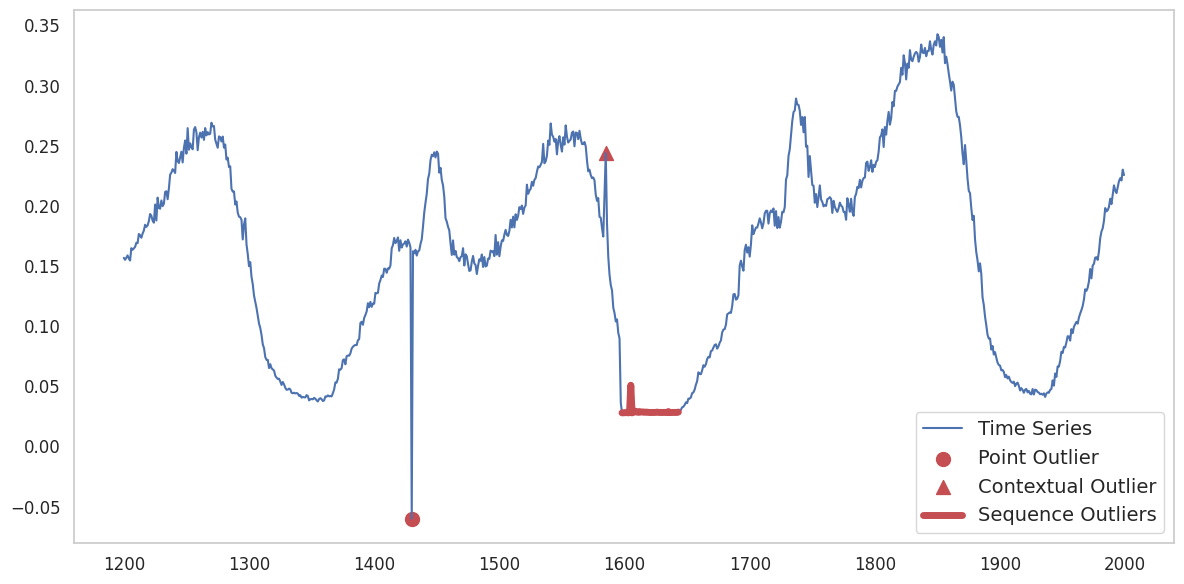

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Package import *

sns.set(style="whitegrid", rc={"axes.grid": False})
palette = sns.color_palette()

# Load dataset
path = "/home/guoyou/OutlierDetection/TSB-UAD/data/IOPS/"
filenames = Filenames2List(path)[0:1]

for filename in filenames:
    df = pd.read_csv(path + filename, header=None)
    values = df[0].values
    values[1585] += 0.03
    labels = df[1].values
    labels[1596:1598] = 0

    # Add new outlier at 1880
    values[1430] = -0.06
    labels[1430] = 1

    time = np.arange(len(values))

    # Restrict to 1200–2000
    start_idx = 1200
    end_idx = 2000
    values = values[start_idx:end_idx]
    labels = labels[start_idx:end_idx]
    time = time[start_idx:end_idx]

    plt.figure(figsize=(12, 6))

    # Plot full time series
    plt.plot(time, values, color=palette[0], linewidth=1.5, label="Time Series")

    # Plot outliers
    outlier_indices = np.where(labels == 1)[0]

    if len(outlier_indices) > 0:
        split_points = np.where(np.diff(outlier_indices) != 1)[0] + 1
        segments = np.split(outlier_indices, split_points)

        point_outlier_labeled = False
        sequence_outlier_labeled = False

        for segment in segments:
            segment_times = time[segment]

            if np.array_equal(segment_times, np.array([1582, 1583, 1584, 1585, 1586])):
                # Special treatment for known contextual outlier group
                idx_1585 = np.where(segment_times == 1585)[0][0]
                plt.scatter(time[segment[idx_1585]], values[segment[idx_1585]],
                            color=palette[3], s=100, marker='^',
                            label="Contextual Outlier" )
                point_outlier_labeled = True

            elif len(segment) == 1:
                # Single-point new outlier (e.g., 1880)
                plt.scatter(time[segment[0]], values[segment[0]],
                            color=palette[3], s=100, marker='o',
                            label="Point Outlier" )
                point_outlier_labeled = True

            else:
                # Sequence outliers
                plt.plot(time[segment], values[segment], color=palette[3], linewidth=5,
                         label="Sequence Outliers" if not sequence_outlier_labeled else "")
                sequence_outlier_labeled = True

    # Academic styling
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14, loc='lower right')


    plt.tight_layout()
    plt.savefig('/home/guoyou/outliertype.pdf', format='pdf')
    plt.show()


时间间隔异常的段索引: []
斜率异常的段索引: []
截距异常的段索引: [7]
最终检测为异常的段索引: [7]


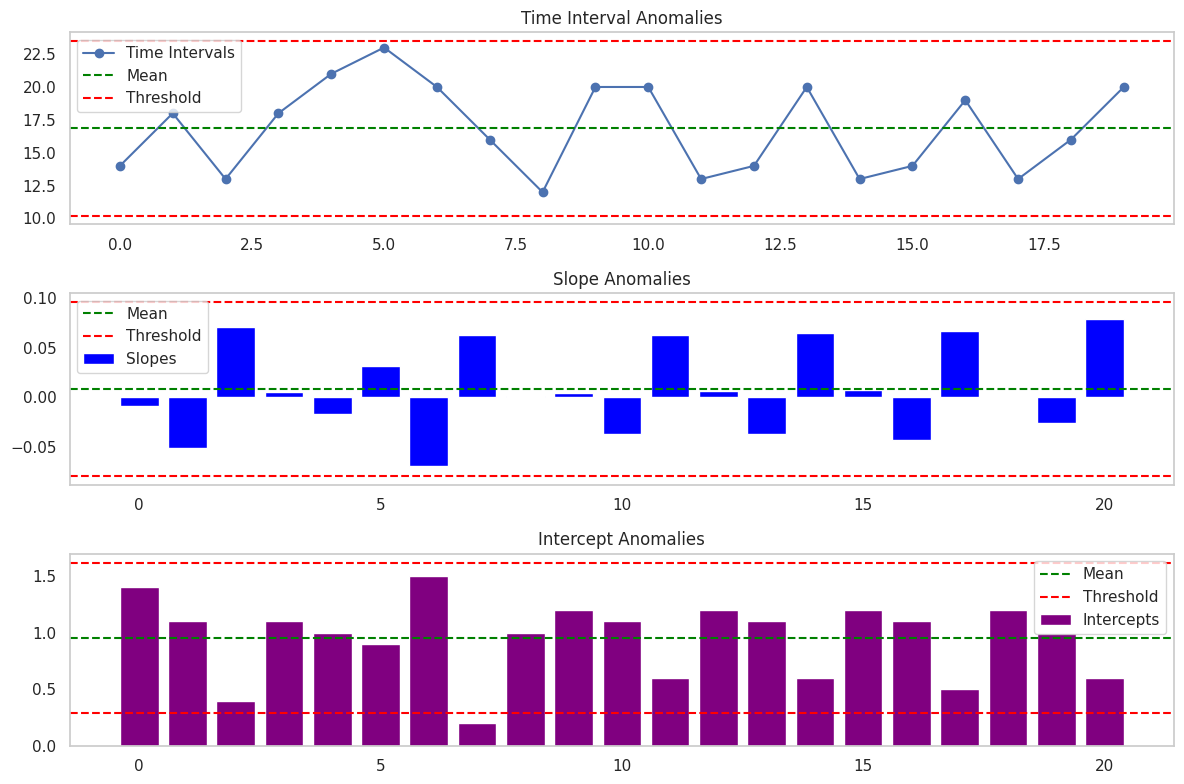

In [102]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 输入数据：每行包含起始和终止时间、斜率和截距
segments = [
    [55002, 55015, -0.009000, 1.4],
    [55016, 55033, -0.051000, 1.1],
    [55034, 55046, 0.070190, 0.4],
    [55047, 55064, 0.005100, 1.1],
    [55065, 55085, -0.016550, 1.0],
    [55086, 55108, 0.031845, 0.9],
    [55109, 55128, -0.068790, 1.5],
    [55129, 55144, 0.062650, 0.2],
    [55145, 55156, 0.001350, 1.0],
    [55157, 55176, 0.004541, 1.2],
    [55177, 55196, -0.037368, 1.1],
    [55197, 55209, 0.063090, 0.6],
    [55210, 55223, 0.005900, 1.2],
    [55224, 55243, -0.036843, 1.1],
    [55244, 55256, 0.064650, 0.6],
    [55257, 55270, 0.007300, 1.2],
    [55271, 55289, -0.043310, 1.1],
    [55290, 55302, 0.067110, 0.5],
    [55303, 55318, 0.000000, 1.2],
    [55319, 55338, -0.026000, 1.0],
    [55339, 55350, 0.078780, 0.6],
]

# 提取信息
start_times = np.array([seg[0] for seg in segments])  # 起始时间
end_times = np.array([seg[1] for seg in segments])    # 终止时间
slopes = np.array([seg[2] for seg in segments])       # 斜率
intercepts = np.array([seg[3] for seg in segments])   # 截距
lengths = end_times - start_times                     # 时间跨度
time_intervals = start_times[1:] - start_times[:-1]   # 时间间隔

# 参数设置
epsilon = 20  # 相似性阈值
slope_threshold = 2 * np.std(slopes)  # 斜率异常阈值
intercept_threshold = 2 * np.std(intercepts)  # 截距异常阈值

# 检测时间间隔异常
time_interval_mean = np.mean(time_intervals)
time_interval_std = np.std(time_intervals)
time_anomalies = np.where(
    abs(time_intervals - time_interval_mean) > 2 * time_interval_std
)[0] + 1  # 时间异常索引（调整为匹配段索引）

# 检测斜率异常
slope_mean = np.mean(slopes)
slope_anomalies = np.where(abs(slopes - slope_mean) > slope_threshold)[0]

# 检测截距异常
intercept_mean = np.mean(intercepts)
intercept_anomalies = np.where(abs(intercepts - intercept_mean) > intercept_threshold)[0]

# 综合异常
anomalies = np.union1d(np.union1d(time_anomalies, slope_anomalies), intercept_anomalies)

# 打印结果
print("时间间隔异常的段索引:", time_anomalies)
print("斜率异常的段索引:", slope_anomalies)
print("截距异常的段索引:", intercept_anomalies)
print("最终检测为异常的段索引:", anomalies)

# 可视化异常
plt.figure(figsize=(12, 8))

# 可视化时间间隔
plt.subplot(3, 1, 1)
plt.plot(range(len(time_intervals)), time_intervals, label="Time Intervals", marker="o")
plt.axhline(y=time_interval_mean, color="green", linestyle="--", label="Mean")
plt.axhline(y=time_interval_mean + 2 * time_interval_std, color="red", linestyle="--", label="Threshold")
plt.axhline(y=time_interval_mean - 2 * time_interval_std, color="red", linestyle="--")
plt.title("Time Interval Anomalies")
plt.legend()

# 可视化斜率
plt.subplot(3, 1, 2)
plt.bar(range(len(slopes)), slopes, color="blue", label="Slopes")
plt.axhline(y=slope_mean, color="green", linestyle="--", label="Mean")
plt.axhline(y=slope_mean + slope_threshold, color="red", linestyle="--", label="Threshold")
plt.axhline(y=slope_mean - slope_threshold, color="red", linestyle="--")
plt.title("Slope Anomalies")
plt.legend()

# 可视化截距
plt.subplot(3, 1, 3)
plt.bar(range(len(intercepts)), intercepts, color="purple", label="Intercepts")
plt.axhline(y=intercept_mean, color="green", linestyle="--", label="Mean")
plt.axhline(y=intercept_mean + intercept_threshold, color="red", linestyle="--", label="Threshold")
plt.axhline(y=intercept_mean - intercept_threshold, color="red", linestyle="--")
plt.title("Intercept Anomalies")
plt.legend()

plt.tight_layout()
plt.show()


### Compression

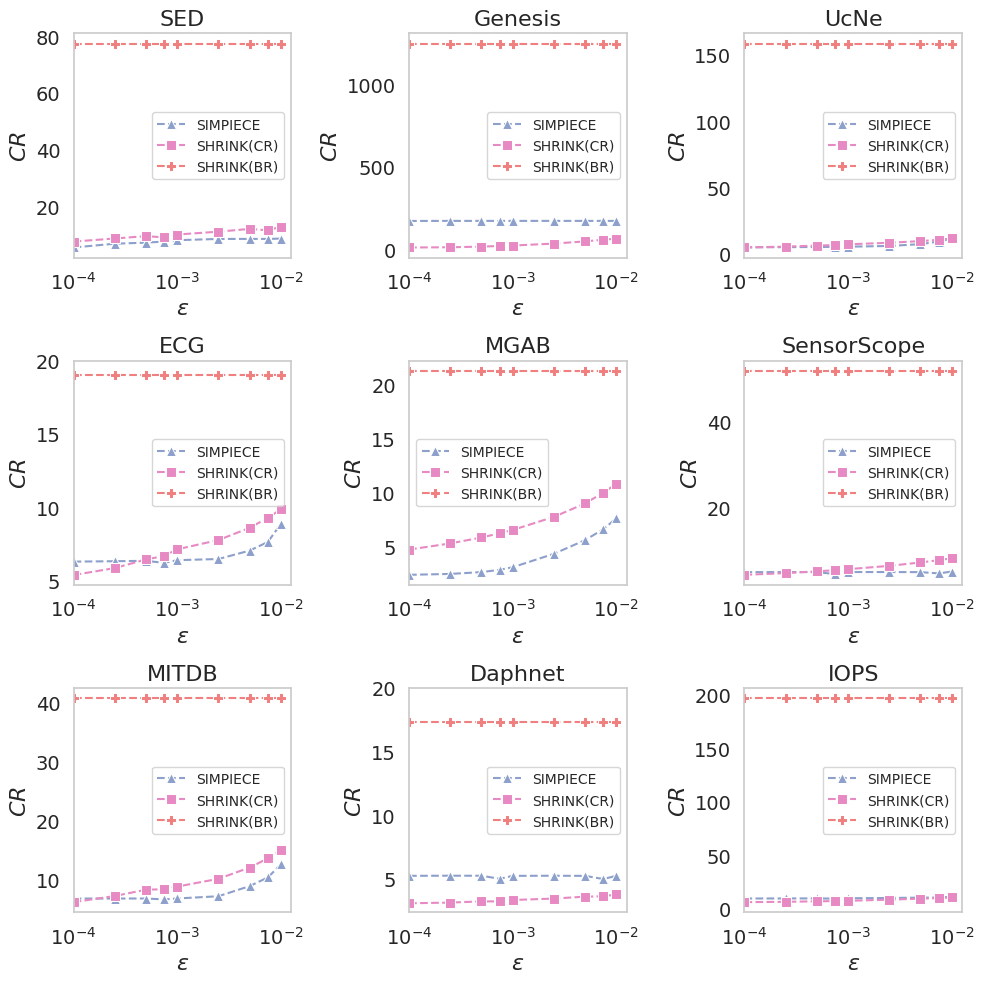

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LogLocator


# Epsilon values and datasets
epsilon_values_default = [0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.0005, 0.00025, 0.0001]  # 默认Epsilon值
datasets = ['SED', 'Genesis', 'UcNe',  'ECG',  'MGAB',  'SensorScope', 'MITDB', 'Daphnet', 'IOPS']

SHRINK_CR = {
'SED':   [12.7596, 11.5207, 12.0151, 11.0369, 10.0377, 9.01306, 9.46843, 8.63475, 7.55533],
'Genesis':   [63.5667, 57.38334, 47.18123, 33.83014, 22.04889, 19.407, 15.51494, 11.54919, 10.20343],
'ECG':   [9.84992, 9.28067, 8.59067, 7.75826, 7.12593, 6.67453, 6.43436, 5.84845, 5.3714],
'MGAB':   [10.7967, 10.0062, 9.00427, 7.76304, 6.55216, 6.24898, 5.86193, 5.31245, 4.74569],
'SensorScope':   [8.08933, 7.63867, 7.10808, 6.31226, 5.53568, 5.29273, 5.04257, 4.60992, 4.21739],
'MITDB':  [14.9682, 13.6033, 12.046, 10.1497, 8.83501, 8.38456, 8.30988, 7.24618, 6.20426],
'Daphnet': [3.76129, 3.61617, 3.58789, 3.43813, 3.32465, 3.21468, 3.21697, 3.12201, 3.06661],
'IOPS': [10.6146, 9.90736, 9.45947, 8.51527, 7.47665, 7.19764, 6.99128, 6.5068, 6.18235],
'UcNe': [11.4, 10.36, 9.392, 8.14, 6.969, 6.41, 6.007, 5.246, 4.58]
}

SHRINK_BR = {
'SED':   [77.36633, 77.36633, 77.36633, 77.36633, 77.36633, 77.36633, 77.36633, 77.36633, 77.36633],
'Genesis':   [1249.45321, 1249.45321, 1249.45321, 1249.45321, 1249.45321, 1249.45321, 1249.45321, 1249.45321, 1249.45321],
'ECG':   [19.0111, 19.0111, 19.0111, 19.0111, 19.0111, 19.0111, 19.0111, 19.0111, 19.0111],
'MGAB':   [21.25398, 21.25398, 21.25398, 21.25398, 21.25398, 21.25398, 21.25398, 21.25398, 21.25398],
'SensorScope':   [51.89259, 51.89259, 51.89259, 51.89259, 51.89259, 51.89259, 51.89259, 51.89259, 51.89259],
'MITDB':   [40.6622, 40.6622, 40.6622, 40.6622, 40.6622, 40.6622, 40.6622, 40.6622, 40.6622],
'Daphnet': [17.32602, 17.32602, 17.32602, 17.32602, 17.32602, 17.32602, 17.32602, 17.32602, 17.32602],
'IOPS': [196.79473, 196.79473, 196.79473, 196.79473, 196.79473, 196.79473, 196.79473, 196.79473, 196.79473],
'UcNe': [158.50, 158.50, 158.50, 158.50, 158.50, 158.50, 158.50, 158.50, 158.50]
}

sim_piece_values = {
'SED':     [8.60271, 8.48491, 8.49154, 8.47376, 8.04115, 7.56696, 7.17067, 6.80415, 5.46585],
'Genesis':   [171.79759, 171.588, 171.79626, 171.80003, 171.79324, 171.62392, 171.79586, 171.80164, 171.35391],
'ECG':          [8.8602, 7.62698, 7.03835, 6.46405, 6.38491, 6.19726, 6.34179, 6.31333, 6.28581],
'MGAB':    [7.62258, 6.62443, 5.61447, 4.35128, 3.11057, 2.87696, 2.66284, 2.49412, 2.41184],
'SensorScope':   [4.96995, 4.55031, 4.84646, 4.86862, 4.86596, 4.38264, 4.85912, 4.85787, 4.84431],
'MITDB':   [12.5672, 10.3809, 8.91571, 7.20286, 6.82687, 6.66522, 6.81965, 6.81838, 6.81052],
'Daphnet': [5.22371, 4.9751, 5.2236, 5.2328, 5.2244, 4.99296, 5.23183, 5.23639, 5.22618],
'IOPS': [11.1691, 10.4744, 10.409, 10.0784, 9.81317, 9.40789, 9.7008, 9.63673, 9.58818],
'UcNe': [11.4, 9.06615, 7.0924, 5.73778, 5.17072, 5.02168, 4.9516, 4.82577, 4.72647]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    epsilon_values = epsilon_values_default
        
    for epsilon in epsilon_values:
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SIMPIECE',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SHRINK' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK(CR)',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_CR[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SHRINK' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK(BR)',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_BR[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'SIMPIECE': '^',  'SHRINK(CR)': 's',  'SHRINK(BR)':'P'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], 'skyblue', 'lightcoral']
palette = [color_palette[2], color_palette[3], 'lightcoral']


# 在绘制之前确定x轴的范围
min_epsilon_default = min(epsilon_values_default)

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  linestyle='--', dashes=False, markers=markers, markersize=7, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=16)
    ax.set_xlabel(r'$\epsilon$', fontsize=16)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=16)  # Set the name of the X-axis here
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(LogLocator(base=10, numticks=5))
    ax.set_xlim(left=min_epsilon_default)
    
    # 设置合理的 y 轴上限
    max_y = df[df['Dataset'] == dataset]['Compression Ratio'].max()
    if max_y <= 20:
        ax.set_ylim(top=20)
    # elif max_y <= 60:
    #     ax.set_ylim(top=60)
    # else:
    #     ax.set_ylim(top=max_y * 1.1)
    ax.tick_params(axis='x', labelsize=14)  # 设置y轴刻度字体大小
    ax.tick_params(axis='y', labelsize=14)  # 设置y轴刻度字体大小
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=10)

plt.tight_layout()


pdf_filename = "/home/guoyou/cr.pdf"
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
plt.show()

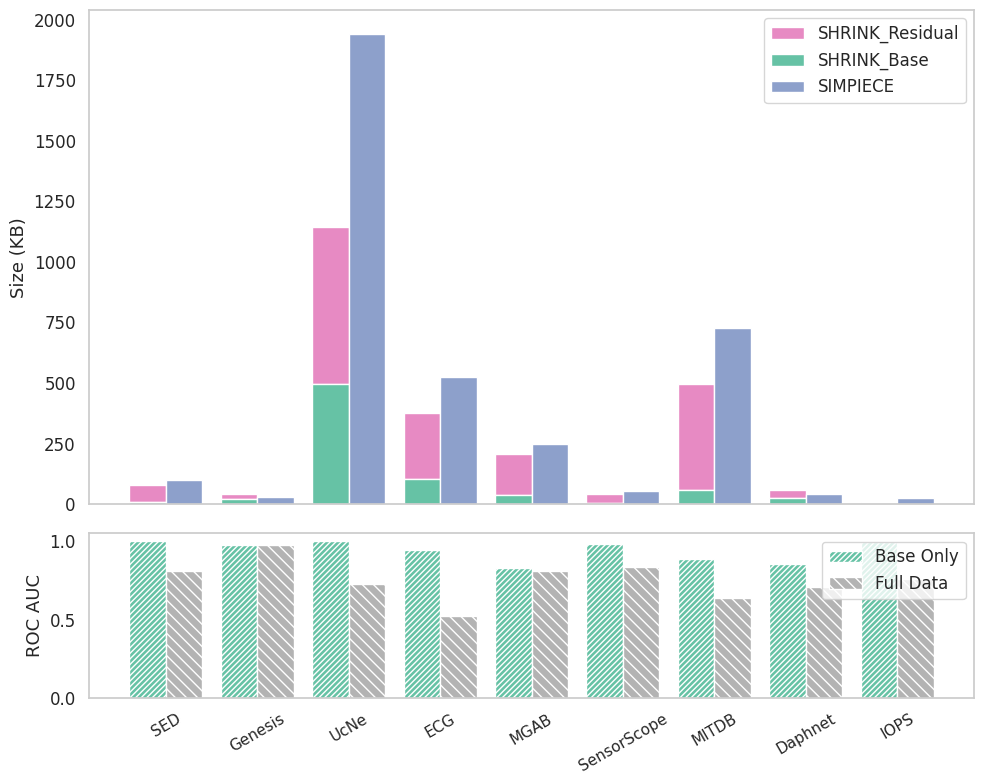

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set style
sns.set(style="whitegrid")
color_palette = sns.color_palette('Set2')

# Dataset and values
datasets = ['SED',  'Genesis',      'UcNe',  'ECG', 'MGAB',      'SensorScope', 'MITDB',     "Daphnet", 'IOPS']
Base =     [10.418, 20.316,       498.20,   102.949, 36.609 ,      4.229,         60.91,      24.852,     4.441]
Residual = [69.879, 22.105,      644.930,  274.742, 169.824,      39.121,         435.824,    33.707,     6.230]
SIMPIECE = [100.61, 31.267, 1942.11,  524.415, 250.048,      53.829,         727.494,    43.695,     25.382]  # 示例对比数据

# ROC AUC values using only the Base (example values, should be replaced with real ones)
ROC_AUC_Base = [0.9986,  0.97864, 0.9979,  0.94628, 0.8285,  0.98425, 0.8840, 0.85492,0.9947]
ROC_AUC_Full = [ 0.8075, 0.97510, 0.7258, 0.5238, 0.81150,  0.8363,  0.63884, 0.71006, 0.7606] 

# Bar width and positions
width = 0.4
x = np.arange(len(datasets))



# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.1)

# Top plot: Size
p2 = ax1.bar(x - width/2, Residual, width, label='SHRINK_Residual', bottom=Base, color=color_palette[3])
p1 = ax1.bar(x - width/2, Base, width, label='SHRINK_Base', color=color_palette[0])
p3 = ax1.bar(x + width/2, SIMPIECE, width, label='SIMPIECE', color=color_palette[2])
ax1.set_ylabel('Size (KB)', fontsize=13)
ax1.tick_params(axis='y', labelsize=12)
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(False)

color_palette = sns.color_palette('Set2')

# Bottom plot: ROC AUC with Base on the left
bar1 = ax2.bar(x - width/2, ROC_AUC_Base, width, label='Base Only', color=color_palette[0], hatch='//////',)
bar2 = ax2.bar(x + width/2, ROC_AUC_Full, width, label='Full Data', color=color_palette[7], hatch="\\\\\\")
ax2.set_ylabel('ROC AUC', fontsize=13)
ax2.set_xticks(x)
ax2.set_xticklabels(datasets, fontsize=11, rotation=30)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylim(0, 1.05)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(False)






pdf_filename = "/home/guoyou/compressSize.pdf"
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

## Time

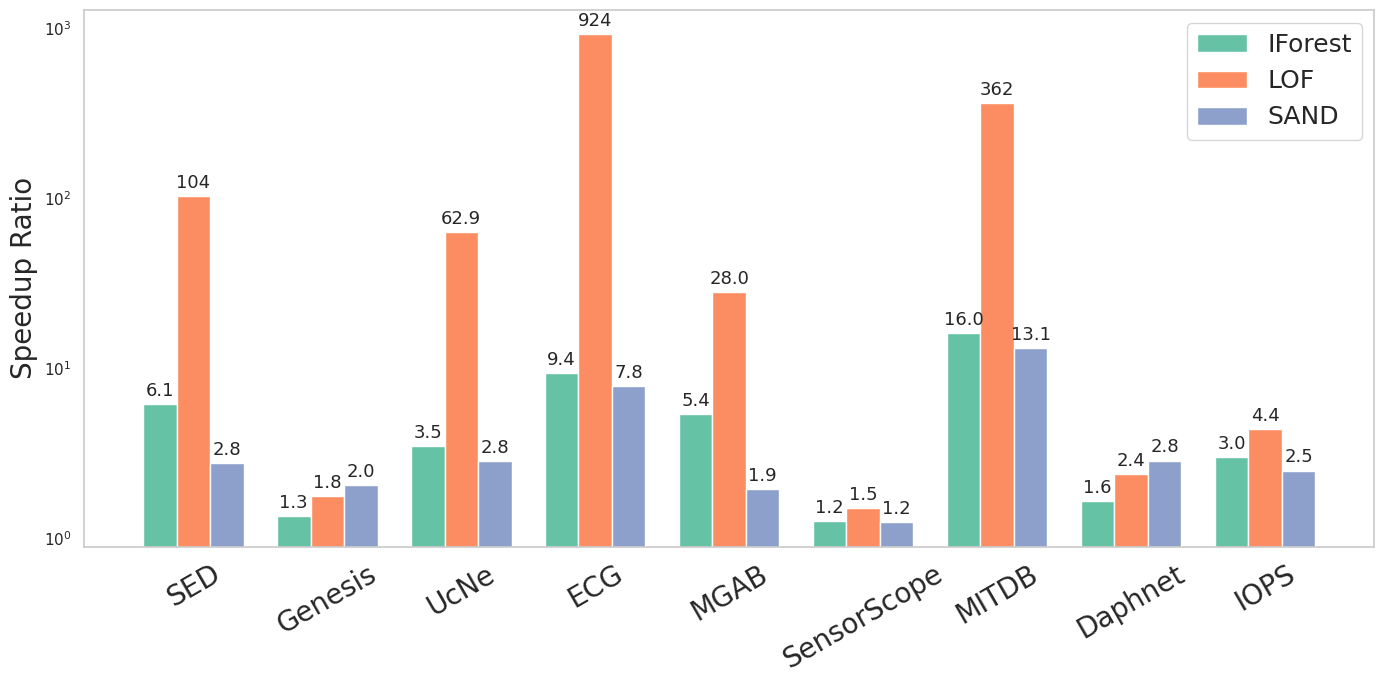

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
sns.set(style="whitegrid")


# # 设置统一较大的字体
# mpl.rcParams['font.size'] = 14   # 全局字体大小
# mpl.rcParams['axes.labelsize'] = 16  # 坐标轴标题字体
# mpl.rcParams['xtick.labelsize'] = 16  # x轴刻度字体
# mpl.rcParams['ytick.labelsize'] = 13  # y轴刻度字体
# mpl.rcParams['legend.fontsize'] = 13  # 图例字体
# mpl.rcParams['legend.title_fontsize'] = 14  # 图例标题字体

# Dataset names
datasets = ['SED', 'Genesis', 'UcNe', 'ECG', 'MGAB', 'SensorScope', 'MITDB', 'Daphnet', 'IOPS']

# Runtime (updated values as you mentioned)
Time = pd.DataFrame({
    'IForest':      [0.61, 0.20, 11.49, 1.31, 0.75, 0.25, 3.85, 0.23, 0.69],
    'IForest_Comp': [0.10, 0.15, 3.30, 0.14, 0.14, 0.20, 0.24, 0.14, 0.23],
    'LOF':          [0.29, 0.53, 314.00, 9.24, 0.28, 0.15, 25.36, 0.19, 4.84],
    'LOF_Comp':     [0.0028, 0.30, 4.99, 0.01, 0.01, 0.10, 0.07, 0.08, 1.11],
    'SAND':         [61.51, 7.45, 385.57, 49.16, 55.84, 11.96, 160.97, 11.99, 30.76,],
    'SAND_Comp':    [22.33, 3.64, 137.02, 6.27, 28.96, 9.72, 12.26, 4.21, 12.37],
}, index=datasets)

# Compute speedup
speedup = pd.DataFrame({
    'IForest': Time['IForest'] / Time['IForest_Comp'],
    'LOF': Time['LOF'] / Time['LOF_Comp'],
    'SAND': Time['SAND'] / Time['SAND_Comp']
})

# Plotting setup
x = np.arange(len(datasets))
width = 0.25
palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width, speedup['IForest'], width, label='IForest', color=palette[0])
bars2 = ax.bar(x, speedup['LOF'], width, label='LOF', color=palette[1])
bars3 = ax.bar(x + width, speedup['SAND'], width, label='SAND', color=palette[2])

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        # Clip annotation for very high bars
        label = f'{height:.1f}' if height < 100 else f'{height:.0f}'
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)
        ax.grid(False)

# Set axis labels and ticks
ax.set_ylabel('Speedup Ratio', fontsize=20)
# ax.set_ylabel('Speedup (Original / Compressed)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=30,  fontsize=20)
ax.set_yscale('log')  # Use log scale to handle large range
ax.legend( fontsize=18)

# Improve layout and appearance
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig('/home/guoyou/Time.pdf', format='pdf')
plt.show()

## Detection accuracy

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import matplotlib as mpl

# sns.set(style="whitegrid")
# mpl.rcParams['font.size'] = 14  # global font size

# # Simulated ROC data for 3 datasets (each column is a method)
# Genesis_ROC = pd.DataFrame({
#     'IForest':    [0.98875, 0.43935, 0.91762, 0.71909, 0.80422, 0.57978],
#     'IForest_Comp': [0.99853, 0.96455, 0.89877, 0.82571, 0.88771, 0.65047],
#     'LOF':     [0.59429, 0.55856, 0.46216, 0.5, 0.5, 0.5],
#     'LOF_Comp':      [0.86861, 0.96191, 0.8485, 0.59399, 0.55827, 0.62223],
#     'SAND':    [0.00112, 0.96902, 0.01088, 0.74499, 0.71669, 0.369],
#     'SAND_Comp':     [0.91554, 0.98014, 0.9939, 0.73137, 0.92739, 0.2983],
# })

# Genesis_PR = pd.DataFrame({
#     'IForest':  [0.39001, 0.00258, 0.09648, 0.00632, 0.00742, 0.00333],
#     'IForest_Comp':  [0.47153, 0.26594, 0.01454, 0.01003, 0.01499, 0.00414],
#     'LOF':      [0.006, 0.04139, 0.00338, 0.00308, 0.00308, 0.00308],
#     'LOF_Comp':      [0.00715, 0.01968, 0.00779, 0.00354, 0.00328, 0.00454],
#     'SAND':     [0.00157, 0.0452, 0.00158, 0.00615, 0.00511, 0.00227],
#     'SAND_Comp':    [0.00972, 0.02016, 0.10887, 0.00552, 0.01926, 0.00308],

# })

# ECG_ROC = pd.DataFrame({
#     'IForest':    [0.48346, 0.48, 0.49],
#     'IForest_Comp': [0.97404, 0.97, 0.975],
#     'LOF':     [0.60955, 0.61, 0.605],
#     'LOF_Comp':      [0.97789, 0.975, 0.978],
#     'SAND':    [0.45849, 0.45, 0.46],
#     'SAND_Comp':     [0.96194, 0.96, 0.963],
# })

# ECG_PR = pd.DataFrame({
#     'IForest':  [0.60242, 0.76305, 0.49593, 0.63865, 0.72111, 0.48562, 0.69097, 0.5958, 0.32469],
#     'IForest_Comp':  [0.84607, 0.68352, 0.48954, 0.69451, 0.75035, 0.60251, 0.65533, 0.59927, 0.76295],
#     'LOF':      [0.68154, 0.12072, 0.1682, 0.09234, 0.24336, 0.23052, 0.12543, 0.09756, 0.0883],
#     'LOF_Comp':      [0.85037, 0.44024, 0.42804, 0.48061, 0.52838, 0.54, 0.53087, 0.41674, 0.30824],
#     'SAND':     [0.56143, 0.72513, 0.22817, 0.72484, 0.14422, 0.13656, 0.70682, 0.47076, 0.02171],
#     'SAND_Comp':     [0.69934, 0.22612, 0.29542, 0.2479, 0.35152, 0.40048, 0.31576, 0.19362, 0.12849],

# })

# MGAB_ROC = pd.DataFrame({
#     'IForest':    [0.56945, 0.54393, 0.70406, 0.44324, 0.46217, 0.60945, 0.57881, 0.61051, 0.68061, 0.58755],
#     'IForest_Comp': [0.94391, 0.90279, 0.93791, 0.94834, 0.95206, 0.93546, 0.95241, 0.92886, 0.94098, 0.90821],
#     'SAND':    [0.67371, 0.5499, 0.48204, 0.79421, 0.57525, 0.46082, 0.5203, 0.48283, 0.62543, 0.57314],
#     'SAND_Comp':  [0.94438, 0.95386, 0.96466, 0.93549, 0.97766, 0.93039, 0.93913, 0.9409, 0.93055, 0.98658],
#     'LOF':     [0.51242, 0.49784, 0.50064, 0.48556, 0.49411, 0.49613, 0.50381, 0.48405, 0.49974, 0.49511],
#     'LOF_Comp':      [0.94484, 0.93733, 0.95064, 0.93132, 0.94128, 0.93869, 0.94742, 0.94188, 0.9425, 0.94691],
# })

# MGAB_PR = pd.DataFrame({
#     'IForest':  [0.00259, 0.00216, 0.0033, 0.0554, 0.03168, 0.00252, 0.00224, 0.00331, 0.00356, 0.00227],
#     'IForest_Comp':  [0.00696, 0.00295, 0.0044, 0.01096, 0.00317, 0.11641, 0.00891, 0.00794, 0.00668, 0.001],
#     'SAND':     [0.0034, 0.00209, 0.00181, 0.10267, 0.00221, 0.00177, 0.0019, 0.00181, 0.07497, 0.00226],
#     'SAND_Comp':    [0.00963, 0.0072, 0.01668, 0.00718, 0.01384, 0.00456, 0.01007, 0.00907, 0.00556, 0.00863],
#     'LOF':      [0.00222, 0.00198, 0.00251, 0.00192, 0.00198, 0.00215, 0.00227, 0.00189, 0.00205, 0.00216],
#     'LOFt_Comp':      [0.00848, 0.00475, 0.00717, 0.00742, 0.00395, 0.00665, 0.00749, 0.00833, 0.00688, 0.00283],

# })

# SensorScope_ROC = pd.DataFrame({
#     'IForest':    [0.79352, 0.59546, 0.59236, 0.66821, 0.56899, 0.61027, 0.6094, 0.66116, 0.57555, 0.51592, 0.57672, 0.61301, 0.55072, 0.58417, 0.60701, 0.58222, 0.68062, 0.50276, 0.48309, 0.47081, 0.66869, 0.47784, 0.49628],
#     'IForest_Comp': [0.84901, 0.6012, 0.58562, 0.69037, 0.59466, 0.68216, 0.62975, 0.68434, 0.61831, 0.65211, 0.56858, 0.66188, 0.61846, 0.685, 0.65704, 0.64449, 0.72609, 0.56214, 0.53224, 0.51706, 0.69012, 0.52817, 0.52962],
#     'LOF':     [0.53583, 0.49712, 0.50739, 0.5096, 0.50753, 0.50632, 0.49845, 0.51767, 0.49409, 0.50117, 0.49119, 0.49152, 0.49903, 0.48896, 0.51033, 0.50496, 0.51333, 0.50845, 0.49481, 0.49749, 0.4925, 0.4941, 0.48639],
#     'LOF_Comp':      [0.57486, 0.50302, 0.49841, 0.49842, 0.53191, 0.5976, 0.52266, 0.55858, 0.51992, 0.53516, 0.52967, 0.50513, 0.53094, 0.60439, 0.55938, 0.53809, 0.54178, 0.51846, 0.54369, 0.52051, 0.56574, 0.51632, 0.50664],
#     'SAND':    [0.30372, 0.43606, 0.40305, 0.347, 0.46764, 0.43437, 0.53111, 0.36999, 0.51347, 0.38678, 0.41637, 0.4097, 0.47935, 0.48375, 0.44016, 0.36861, 0.49014, 0.39518, 0.62634, 0.56042, 0.53986, 0.45006, 0.59025],
#     'SAND_Comp':  [0.25758, 0.46433, 0.5287, 0.59647, 0.5207, 0.47677, 0.55412, 0.62205, 0.52632, 0.46094, 0.51241, 0.52587, 0.49098, 0.58706, 0.53541, 0.40339, 0.42058, 0.5448, 0.49037, 0.56919, 0.7225, 0.64611, 0.61859],
# })

# SensorScope_PR = pd.DataFrame({
#     'IForest':  [0.31086, 0.2991, 0.27464, 0.33466, 0.33001, 0.37179, 0.30172, 0.36467, 0.26544, 0.23859, 0.26726, 0.29834, 0.25236, 0.36084, 0.2929, 0.339, 0.52693, 0.24561, 0.21896, 0.22656, 0.32479, 0.2152, 0.23477],
#     'IForest_Comp':  [0.36074, 0.29367, 0.26188, 0.35007, 0.33876, 0.33241, 0.30071, 0.33409, 0.26681, 0.28534, 0.26928, 0.30102, 0.28754, 0.35864, 0.25296, 0.33913, 0.54261, 0.2563, 0.21808, 0.22144, 0.2905, 0.21589, 0.22703],
#     'LOF':     [0.17132, 0.21839, 0.2176, 0.19811, 0.23514, 0.29036, 0.24367, 0.27174, 0.2176, 0.20931, 0.22779, 0.2354, 0.23569, 0.27156, 0.24496, 0.21775, 0.27177, 0.23073, 0.21352, 0.2115, 0.1463, 0.20169, 0.2052],
#     'LOF_Comp':  [0.21486, 0.21947, 0.20557, 0.20349, 0.25355, 0.26464, 0.23856, 0.25169, 0.20977, 0.20859, 0.23293, 0.21145, 0.2432, 0.26706, 0.21019, 0.21708, 0.28075, 0.22558, 0.21207, 0.20657, 0.13715, 0.20021, 0.20298],
#     'SAND':     [0.1318, 0.20149, 0.17073, 0.14362, 0.20996, 0.24654, 0.27186, 0.19431, 0.23717, 0.18026, 0.19459, 0.1951, 0.21893, 0.28915, 0.19745, 0.16659, 0.36757, 0.1812, 0.3061, 0.30099, 0.15041, 0.18092, 0.24577],
#     'SAND_Comp':    [0.0809, 0.20433, 0.24547, 0.22099, 0.2368, 0.19697, 0.28169, 0.26774, 0.21922, 0.16185, 0.23593, 0.23072, 0.22389, 0.24714, 0.21817, 0.15369, 0.20028, 0.23407, 0.21278, 0.225, 0.20068, 0.26763, 0.26475],

# })

# MITDB_ROC = pd.DataFrame({
#     'IForest':    [0.49283, 0.55735, 0.75716, 0.63139, 0.65428, 0.78287, 0.85927, 0.87819, 0.99827, 0.52731, 0.56143, 0.77961, 0.88737, 0.52278, 0.48133, 0.68179, 0.51156, 0.90331, 0.80203, 0.90064, 0.87435, 0.80983, 0.52476, 0.55314, 0.81459, 0.81738, 0.64477, 0.71729, 0.8289, 0.3863, 0.62715, 0.58584],
#     'IForest_Comp': [0.91856, 0.94792, 0.92097, 0.9283, 0.93033, 0.95712, 0.94529, 0.96449, 0.993, 0.88391, 0.90459, 0.95739, 0.9826, 0.95212, 0.95782, 0.96509, 0.93726, 0.98668, 0.96503, 0.96825, 0.96909, 0.97077, 0.84151, 0.81979, 0.96665, 0.98727, 0.94375, 0.91076, 0.95305, 0.94791, 0.89494, 0.99773],
#     'LOF':     [0.5011, 0.50062, 0.50126, 0.49945, 0.50327, 0.50675, 0.49959, 0.50324, 0.52306, 0.50023, 0.50051, 0.50053, 0.5019, 0.50043, 0.50135, 0.50137, 0.49965, 0.49965, 0.50141, 0.50056, 0.50443, 0.50062, 0.50062, 0.50012, 0.50042, 0.50064, 0.50016, 0.50017, 0.50025, 0.50042, 0.49966, 0.50289],
#     'LOF_Comp':      [0.93295, 0.94427, 0.90589, 0.91352, 0.92153, 0.9128, 0.92822, 0.8944, 0.86975, 0.9016, 0.91172, 0.92283, 0.91003, 0.95052, 0.96171, 0.94078, 0.90527, 0.90052, 0.9202, 0.92197, 0.94556, 0.95665, 0.8539, 0.82409, 0.92832, 0.96224, 0.92048, 0.89233, 0.92906, 0.94931, 0.89194, 0.98632],
#     'SAND':    [0.96585, 0.95531, 0.87549, 0.91496, 0.99817, 0.99584, 0.81625, 0.34454, 0.52069, 0.91097, 0.86429, 0.47651, 0.99307, 0.95488, 0.63101, 0.98708, 0.42861, 0.64151, 0.82974, 0.93115, 0.99762, 0.98014, 0.81572, 0.43004, 0.79559, 0.18456, 0.96534, 0.93011, 0.95222, 0.98486, 0.98571, 0.97299],
#     'SAND_Comp':     [0.92486, 0.95028, 0.89509, 0.94279, 0.9222, 0.89688, 0.91406, 0.90186, 0.90792, 0.89866, 0.90137, 0.91422, 0.96097, 0.94269, 0.95114, 0.94079, 0.9746, 0.92146, 0.88105, 0.89522, 0.90301, 0.95975, 0.80162, 0.76901, 0.89649, 0.95069, 0.93129, 0.89528, 0.90029, 0.94704, 0.91582, 0.97887],
# })

# MITDB_PR = pd.DataFrame({
#     'IForest':  [0.03225, 0.02477, 0.09321, 0.04912, 0.04476, 0.126, 0.00262, 0.01176, 0.16983, 0.08118, 0.08316, 0.78521, 0.00596, 0.44885, 0.44929, 0.26096, 0.00034, 0.00177, 0.63699, 0.77191, 0.78735, 0.17851, 0.14496, 0.13226, 0.74812, 0.75555, 0.4251, 0.40035, 0.72932, 0.35504, 0.02702, 0.0229],
#     'IForest_Comp':  [0.04381, 0.04241, 0.08127, 0.05283, 0.07031, 0.1623, 0.00381, 0.01537, 0.0747, 0.08212, 0.08804, 0.72911, 0.00755, 0.46958, 0.46274, 0.32341, 0.00021, 0.00213, 0.60602, 0.69708, 0.60802, 0.20563, 0.22675, 0.18082, 0.61805, 0.71449, 0.46884, 0.36452, 0.64155, 0.48988, 0.02595, 0.61361],
#     'LOF':      [0.01864, 0.01843, 0.03587, 0.03544, 0.0193, 0.02468, 0.00057, 0.00079, 0.00187, 0.06115, 0.06124, 0.32034, 0.00088, 0.27735, 0.27904, 0.09914, 0.00036, 0.00036, 0.19924, 0.19793, 0.07316, 0.05919, 0.103, 0.10264, 0.20223, 0.20322, 0.24161, 0.24193, 0.34361, 0.34373, 0.01584, 0.01761],
#     'LOF_Comp':      [0.04912, 0.02244, 0.07469, 0.04443, 0.06465, 0.05675, 0.00268, 0.00297, 0.00643, 0.10091, 0.08289, 0.45514, 0.00141, 0.4132, 0.44217, 0.1794, 0.00014, 0.00028, 0.3321, 0.38333, 0.19972, 0.13887, 0.20991, 0.17964, 0.32079, 0.37487, 0.39346, 0.32842, 0.49576, 0.49279, 0.02539, 0.03588],
#     'SAND':     [0.37163, 0.27561, 0.11666, 0.47327, 0.92402, 0.8802, 0.00241, 0.00045, 0.00065, 0.44745, 0.27801, 0.55503, 0.27062, 0.89543, 0.47678, 0.89913, 0.0003, 0.00051, 0.69288, 0.72085, 0.96481, 0.70488, 0.45764, 0.25373, 0.36573, 0.12792, 0.91069, 0.76299, 0.88697, 0.9698, 0.37685, 0.32865],
#     'SAND_Comp':    [0.03992, 0.05824, 0.06057, 0.08416, 0.05866, 0.04299, 0.00226, 0.00271, 0.00634, 0.11907, 0.07775, 0.41282, 0.00437, 0.38931, 0.36193, 0.1751, 0.00053, 0.00038, 0.22048, 0.29386, 0.10494, 0.1514, 0.14623, 0.137, 0.22428, 0.29172, 0.47065, 0.35824, 0.38434, 0.5081, 0.03028, 0.01785],

# })

# Daphnet_ROC = pd.DataFrame({
#     'IForest':    [0.39426, 0.49561, 0.67182, 0.81023, 0.8041, 0.67212, 0.82325, 0.80612, 0.81736, 0.81868, 0.82775, 0.79367, 0.85147, 0.82662, 0.83328, 0.88804, 0.88273, 0.87706, 0.89351, 0.89818, 0.89513, 0.89999, 0.84508, 0.84417, 0.85992, 0.86793, 0.82334, 0.80577, 0.19453, 0.35079, 0.61628, 0.48917, 0.53221, 0.59456, 0.53285, 0.44646, 0.58126, 0.4608, 0.80922, 0.83733, 0.83873, 0.85272, 0.88452, 0.82191, 0.81481],
#     'IForest_Comp': [0.86458, 0.84281, 0.9572, 0.91843, 0.9203, 0.88573, 0.92017, 0.8994, 0.92504, 0.91494, 0.91855, 0.9244, 0.93257, 0.94224, 0.89361, 0.9143, 0.93686, 0.92006, 0.92389, 0.93446, 0.94687, 0.95163, 0.94537, 0.87454, 0.91001, 0.87762, 0.87108, 0.85523, 0.42468, 0.74823, 0.87339, 0.81936, 0.84935, 0.86486, 0.79574, 0.77239, 0.90216, 0.86448, 0.90792, 0.74988, 0.87717, 0.9152, 0.86725, 0.86817, 0.85967],
#     'LOF':     [0.4946, 0.50239, 0.50564, 0.50978, 0.51324, 0.50281, 0.50469, 0.50754, 0.5045, 0.50528, 0.50726, 0.5146, 0.51181, 0.51379, 0.50449, 0.52088, 0.54986, 0.51869, 0.54563, 0.52205, 0.52562, 0.52416, 0.51241, 0.55259, 0.54604, 0.52378, 0.52142, 0.51486, 0.5, 0.49958, 0.52372, 0.50631, 0.49659, 0.49215, 0.49855, 0.49676, 0.50991, 0.50481, 0.49664, 0.4998, 0.55259, 0.54604, 0.52378, 0.52142, 0.51486],
#     'LOF_Comp':  [0.78103, 0.78814, 0.80867, 0.74078, 0.76428, 0.76482, 0.69665, 0.72824, 0.81325, 0.70604, 0.692, 0.71788, 0.76217, 0.74056, 0.66965, 0.62412, 0.62813, 0.68248, 0.73053, 0.76958, 0.75734, 0.75279, 0.84064, 0.55892, 0.73813, 0.63131, 0.59502, 0.63341, 0.52399, 0.80839, 0.71092, 0.80165, 0.73393, 0.7981, 0.73426, 0.7611, 0.84445, 0.8218, 0.6696, 0.58606, 0.55892, 0.73813, 0.63131, 0.59502, 0.63341],
#     'SAND':    [0.76134, 0.85294, 0.84069, 0.79533, 0.71238, 0.81491, 0.22381, 0.24993, 0.24279, 0.18171, 0.18285, 0.38036, 0.17962, 0.17622, 0.21551, 0.22853, 0.4731, 0.20115, 0.57396, 0.19273, 0.10842, 0.27101, 0.27112, 0.21086, 0.83058, 0.37594, 0.42822, 0.16489, 0.37883, 0.62882, 0.84499, 0.83434, 0.84742, 0.80207, 0.8471, 0.81747, 0.84823, 0.80032, 0.20892, 0.18205, 0.27992, 0.27809, 0.45861, 0.41547, 0.17741],
#     'SAND_Comp':   [0.88135, 0.94371, 0.75209, 0.78906, 0.8801, 0.87256, 0.78948, 0.81765, 0.80212, 0.8645, 0.48841, 0.73576, 0.89777, 0.5814, 0.78752, 0.50401, 0.38139, 0.7606, 0.66228, 0.81383, 0.67715, 0.90443, 0.88602, 0.39243, 0.81818, 0.70298, 0.85361, 0.65759, 0.60784, 0.80187, 0.70344, 0.82928, 0.74864, 0.80946, 0.71612, 0.7643, 0.92638, 0.83833, 0.94171, 0.67176, 0.28029, 0.8441, 0.6714, 0.90309, 0.70749],
# })

# Daphnet_PR = pd.DataFrame({
#     'IForest':  [0.04065, 0.05107, 0.14988, 0.50992, 0.53711, 0.21958, 0.37157, 0.3452, 0.35702, 0.36467, 0.48094, 0.47517, 0.52461, 0.51301, 0.49809, 0.50686, 0.49278, 0.40707, 0.53305, 0.51816, 0.57368, 0.53118, 0.38816, 0.12943, 0.13044, 0.15091, 0.06867, 0.08158, 0.00209, 0.12511, 0.06304, 0.03724, 0.04132, 0.04077, 0.05664, 0.03048, 0.04541, 0.02833, 0.36339, 0.39791, 0.12261, 0.12866, 0.19263, 0.06849, 0.08302],
#     'IForest_Comp':  [0.03492, 0.04516, 0.38142, 0.41517, 0.47339, 0.24941, 0.3622, 0.33529, 0.37645, 0.32487, 0.4805, 0.47568, 0.53438, 0.56859, 0.38917, 0.51281, 0.53254, 0.36139, 0.53708, 0.54336, 0.60715, 0.52839, 0.43707, 0.10432, 0.1082, 0.09477, 0.07016, 0.08997, 0.00581, 0.15575, 0.12675, 0.04579, 0.05691, 0.03703, 0.04283, 0.02346, 0.04232, 0.04103, 0.30552, 0.17709, 0.11379, 0.12015, 0.0849, 0.0685, 0.09226],
#     'LOF':      [0.05379, 0.05411, 0.05519, 0.14616, 0.14703, 0.13906, 0.15298, 0.15446, 0.15279, 0.15354, 0.23221, 0.23684, 0.2374, 0.23471, 0.2242, 0.17179, 0.18488, 0.1608, 0.17942, 0.17073, 0.1814, 0.16626, 0.14722, 0.04538, 0.04079, 0.03181, 0.02951, 0.02976, 0.0036, 0.14948, 0.03604, 0.03479, 0.03376, 0.0332, 0.03383, 0.03379, 0.03636, 0.03411, 0.20659, 0.20729, 0.04538, 0.04079, 0.03181, 0.02951, 0.02976],
#     'LOF_Comp':  [0.01771, 0.03403, 0.0443, 0.13753, 0.14914, 0.11114, 0.15, 0.17575, 0.19953, 0.10393, 0.2281, 0.23267, 0.26846, 0.26432, 0.13267, 0.17984, 0.1789, 0.18593, 0.24106, 0.24375, 0.21839, 0.16901, 0.18903, 0.0405, 0.05297, 0.04396, 0.03776, 0.04138, 0.00504, 0.15942, 0.03516, 0.04787, 0.02986, 0.03346, 0.02984, 0.02414, 0.03038, 0.03743, 0.24024, 0.09179, 0.0405, 0.05297, 0.04396, 0.03776, 0.04138],
#     'SAND':     [0.10196, 0.19129, 0.15469, 0.26325, 0.19796, 0.28556, 0.09219, 0.09492, 0.09393, 0.08783, 0.13546, 0.16652, 0.13267, 0.13309, 0.13837, 0.08708, 0.11931, 0.08353, 0.14389, 0.08262, 0.07715, 0.08858, 0.08874, 0.01691, 0.08817, 0.02138, 0.02205, 0.01557, 0.00277, 0.17783, 0.09511, 0.08948, 0.09613, 0.08395, 0.09382, 0.07826, 0.09844, 0.09274, 0.1334, 0.12892, 0.01835, 0.01879, 0.02409, 0.02152, 0.01582],
#     'SAND_Comp':    [0.02898, 0.1871, 0.03016, 0.12393, 0.26861, 0.17946, 0.13447, 0.2385, 0.1675, 0.17919, 0.10075, 0.14136, 0.40099, 0.11357, 0.27783, 0.1197, 0.0656, 0.28842, 0.19461, 0.34226, 0.13924, 0.2588, 0.24663, 0.01803, 0.05761, 0.04488, 0.11086, 0.03584, 0.00837, 0.15715, 0.03298, 0.05303, 0.03281, 0.0212, 0.02699, 0.02178, 0.06802, 0.04635, 0.46036, 0.3078, 0.0158, 0.06144, 0.08744, 0.11234, 0.03947],

# })

# IOPS_ROC = pd.DataFrame({
#     'IForest':    [0.63316, 0.47885, 0.87529, 0.91985, 0.98394, 0.98059, 0.90884, 0.94492, 0.83011, 0.98452, 0.72226, 0.78598, 0.92037, 0.92338, 0.90216, 0.98293, 0.93543, 0.92009, 0.85255, 0.67265, 0.52549, 0.44928, 0.94107, 0.9641, 0.90478, 0.93503, 0.86267, 0.79948, 0.67916, 0.78372, 0.94246, 0.99133, 0.94295, 0.91008, 0.99797, 0.99906, 0.83427, 0.89331, 0.97619, 0.99186, 0.4222, 0.46343, 0.93197, 0.90733, 0.89124, 0.61613, 0.87505, 0.91975, 0.51429, 0.21575, 0.52575, 0.37538, 0.67792, 0.8574, 0.97122, 0.98543, 0.94438, 0.97687],
#     'IForest_Comp': [0.74299, 0.77833, 0.9527, 0.97534, 0.99643, 0.97121, 0.97314, 0.98718, 0.98849, 0.99449, 0.79009, 0.87861, 0.96576, 0.95807, 0.94007, 0.99096, 0.98601, 0.99039, 0.93739, 0.83497, 0.69181, 0.63231, 0.91761, 0.97554, 0.97123, 0.9837, 0.99201, 0.96282, 0.89761, 0.81154, 0.97399, 0.99377, 0.96766, 0.95293, 0.95851, 0.999, 0.87274, 0.96231, 0.98494, 0.98969, 0.46814, 0.6082, 0.98492, 0.99391, 0.9478, 0.81274, 0.96988, 0.98215, 0.58969, 0.5949, 0.97167, 0.96351, 0.811, 0.91458, 0.98949, 0.71047, 0.99433, 0.93515],
#     'LOF':     [0.59445, 0.51999, 0.5363, 0.59152, 0.53428, 0.53192, 0.55452, 0.56834, 0.51251, 0.51415, 0.53327, 0.57561, 0.555, 0.5719, 0.5808, 0.5307, 0.57195, 0.60806, 0.51831, 0.50885, 0.56877, 0.5129, 0.51468, 0.50725, 0.5689, 0.57849, 0.67472, 0.6648, 0.51167, 0.50777, 0.55552, 0.52694, 0.72281, 0.68945, 0.77087, 0.67045, 0.52553, 0.47263, 0.5617, 0.54061, 0.52542, 0.53711, 0.5623, 0.58651, 0.51985, 0.49186, 0.55333, 0.59339, 0.61808, 0.75286, 0.51765, 0.52752, 0.49039, 0.51047, 0.53388, 0.52186, 0.50906, 0.51089],
#     'LOF_Comp':  [0.6808, 0.53339, 0.75905, 0.72547, 0.8397, 0.79941, 0.73679, 0.69705, 0.84259, 0.87339, 0.69361, 0.59199, 0.86416, 0.7126, 0.75625, 0.69003, 0.83047, 0.81339, 0.69731, 0.67632, 0.59785, 0.63004, 0.59819, 0.56303, 0.78664, 0.73231, 0.93086, 0.92671, 0.71153, 0.60111, 0.7695, 0.70412, 0.82916, 0.80347, 0.84762, 0.68676, 0.65212, 0.66975, 0.68532, 0.77699, 0.56123, 0.53734, 0.82811, 0.8229, 0.70013, 0.66364, 0.76022, 0.72843, 0.5686, 0.93828, 0.97506, 0.97717, 0.74008, 0.65896, 0.93335, 0.92544, 0.86127, 0.86443],
#     'SAND':    [0.5498, 0.47059, 0.44408, 0.20305, 0.44386, 0.48914, 0.46967, 0.57798, 0.40536, 0.5191, 0.4225, 0.37033, 0.29546, 0.48644, 0.68589, 0.23241, 0.51478, 0.17484, 0.5573, 0.46856, 0.71113, 0.38742, 0.22988, 0.21401, 0.27753, 0.49946, 0.27644, 0.06978, 0.39984, 0.52802, 0.72214, 0.18035, 0.47712, 0.09885, 0.99553, 0.99741, 0.40593, 0.52904, 0.23409, 0.52173, 0.62196, 0.73502, 0.23836, 0.15118, 0.58044, 0.43558, 0.36686, 0.23459, 0.75325, 0.54274, 0.43988, 0.35779, 0.79672, 0.5051, 0.55204, 0.49078, 0.5289, 0.41234],
#     'SAND_Comp':  [0.78935, 0.5223, 0.94611, 0.78309, 0.83997, 0.85278, 0.88676, 0.67464, 0.95922, 0.86571, 0.81287, 0.88735, 0.92964, 0.93927, 0.76719, 0.79183, 0.82934, 0.89177, 0.8423, 0.84502, 0.57326, 0.58903, 0.9386, 0.64537, 0.94905, 0.8886, 0.97701, 0.84671, 0.92341, 0.64724, 0.7029, 0.80675, 0.7437, 0.55431, 0.98784, 0.99861, 0.88748, 0.67395, 0.49532, 0.81392, 0.56725, 0.72103, 0.8376, 0.77162, 0.89217, 0.8537, 0.94636, 0.71862, 0.83392, 0.75703, 0.97925, 0.98668, 0.83965, 0.60554, 0.96213, 0.7091, 0.99404, 0.91842],
# })

# IOPS_PR = pd.DataFrame({
#     'IForest':  [0.01038, 0.00226, 0.01921, 0.37271, 0.7636, 0.63606, 0.03658, 0.49253, 0.60683, 0.59384, 0.01856, 0.00839, 0.32233, 0.56783, 0.17603, 0.89668, 0.57305, 0.55109, 0.42915, 0.05007, 0.02535, 0.01302, 0.50088, 0.52421, 0.02597, 0.27458, 0.03026, 0.00265, 0.01595, 0.01094, 0.28736, 0.91431, 0.20464, 0.52713, 0.09276, 0.35035, 0.13375, 0.71392, 0.56443, 0.82025, 0.01383, 0.0165, 0.62168, 0.53986, 0.46239, 0.02517, 0.01943, 0.37368, 0.00668, 0.00048, 0.11026, 0.06612, 0.01909, 0.05671, 0.66727, 0.68075, 0.62487, 0.50319],
#     'IForest_Comp':  [0.01337, 0.00478, 0.03834, 0.53974, 0.71376, 0.51061, 0.05213, 0.54467, 0.5167, 0.59802, 0.01881, 0.01259, 0.25763, 0.56997, 0.26012, 0.88305, 0.74164, 0.83139, 0.28144, 0.0534, 0.02632, 0.01428, 0.39633, 0.62841, 0.06176, 0.34057, 0.02814, 0.01256, 0.02243, 0.0091, 0.22298, 0.89544, 0.27397, 0.51013, 0.0075, 0.47724, 0.16208, 0.80839, 0.59949, 0.7062, 0.01428, 0.02344, 0.69603, 0.83742, 0.41227, 0.01611, 0.06679, 0.58162, 0.00769, 0.00082, 0.25149, 0.16603, 0.02682, 0.06115, 0.57678, 0.17204, 0.76542, 0.29073],
#     'LOF':      [0.20215, 0.11674, 0.01869, 0.0546, 0.05106, 0.0864, 0.02039, 0.04909, 0.0275, 0.06448, 0.00647, 0.00495, 0.06427, 0.05572, 0.04914, 0.08898, 0.07764, 0.08551, 0.05074, 0.02742, 0.06755, 0.0134, 0.03401, 0.07057, 0.01636, 0.04598, 0.02724, 0.01432, 0.006, 0.00441, 0.0532, 0.08072, 0.09553, 0.07049, 0.07005, 0.06728, 0.02621, 0.04818, 0.02416, 0.05473, 0.06148, 0.14602, 0.07601, 0.07755, 0.0582, 0.01721, 0.01875, 0.05795, 0.17107, 0.33427, 0.09367, 0.07748, 0.01422, 0.03187, 0.03534, 0.069, 0.03107, 0.058],
#     'LOF_Comp':  [0.0421, 0.01428, 0.04965, 0.05171, 0.04832, 0.09785, 0.02442, 0.05267, 0.03486, 0.06928, 0.03997, 0.0063, 0.05096, 0.05978, 0.03514, 0.10101, 0.0345, 0.10175, 0.04148, 0.0201, 0.02685, 0.01447, 0.02684, 0.0558, 0.0189, 0.02181, 0.01583, 0.01343, 0.00574, 0.00394, 0.04, 0.10775, 0.03763, 0.01739, 0.44079, 0.26043, 0.02142, 0.08311, 0.02559, 0.08286, 0.02049, 0.01962, 0.03552, 0.09373, 0.04854, 0.0086, 0.02928, 0.03639, 0.01297, 0.01638, 0.2266, 0.26487, 0.02256, 0.03496, 0.12472, 0.25181, 0.05981, 0.14777],
#     'SAND':     [0.0086, 0.00164, 0.00348, 0.00414, 0.02064, 0.05566, 0.00568, 0.01232, 0.10754, 0.05037, 0.00396, 0.00181, 0.02261, 0.01847, 0.04642, 0.03506, 0.01272, 0.00529, 0.04313, 0.02238, 0.07573, 0.00988, 0.0192, 0.05399, 0.00332, 0.00808, 0.0004, 0.00044, 0.00408, 0.00445, 0.02855, 0.04214, 0.02889, 0.00372, 0.04707, 0.19628, 0.01594, 0.14803, 0.01044, 0.04809, 0.02263, 0.03925, 0.00691, 0.00526, 0.05226, 0.01414, 0.00338, 0.00356, 0.01364, 0.50031, 0.06759, 0.04846, 0.26085, 0.01008, 0.036, 0.05533, 0.20457, 0.04328],
#     'SAND_Comp':   [0.02055, 0.00175, 0.04135, 0.05227, 0.03696, 0.33015, 0.01952, 0.01449, 0.175, 0.05221, 0.01279, 0.01541, 0.10327, 0.35632, 0.02264, 0.11629, 0.0255, 0.0685, 0.05064, 0.04968, 0.02882, 0.01302, 0.16087, 0.07049, 0.03699, 0.13723, 0.00794, 0.00167, 0.01949, 0.00472, 0.01204, 0.12716, 0.03795, 0.0075, 0.01663, 0.239, 0.07217, 0.04849, 0.01512, 0.10791, 0.02135, 0.03509, 0.031, 0.01388, 0.26921, 0.02986, 0.02777, 0.02728, 0.01949, 0.0014, 0.23993, 0.57515, 0.05, 0.01143, 0.52022, 0.11743, 0.71703, 0.27724],

# })




# # Color palette: grouped by method type
# color_palette = sns.color_palette("Set3")
# palette = [color_palette[4], color_palette[3], color_palette[4], color_palette[3], color_palette[4], color_palette[3]]

# # Create figure with 2 rows and 3 columns
# fig, axs = plt.subplots(2, 7, figsize=(14, 8), sharey='row')

# dataset_names = [ 'Genesis', 'ECG','MGAB', 'SensorScope',  'MITDB', 'Daphnet', 'IOPS']
# roc_data_list = [Genesis_ROC, ECG_ROC, MGAB_ROC, SensorScope_ROC, MITDB_ROC, Daphnet_ROC, IOPS_ROC]
# pr_data_list = [Genesis_PR, ECG_PR, MGAB_PR, SensorScope_PR, MITDB_PR, Daphnet_PR, IOPS_PR]

# # --- Top Row: ROC Boxplots ---
# for i, ax in enumerate(axs[0]):
#     sns.boxplot(data=roc_data_list[i], palette=palette, fliersize=2, orient='v', ax=ax)
#     ax.set_title(f'{dataset_names[i]}', fontsize=13)
#     ax.set_xticklabels("", rotation=45, ha='right')
#     ax.set_ylabel('AUC ROC' if i == 0 else '')
#     ax.tick_params(labelsize=11)
#     ax.grid(False)


# # --- Bottom Row: PR Boxplots ---
# for i, ax in enumerate(axs[1]):
#     sns.boxplot(data=pr_data_list[i], palette=palette, fliersize=2, orient='v', ax=ax)
#     # ax.set_title(f' {dataset_names[i]}', fontsize=13)
#     ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', fontsize=11)
#     ax.set_ylabel('AUC PR' if i == 0 else '')
#     ax.tick_params(labelsize=11)
#     ax.grid(False)
#     ax.tick_params(axis='x', labelsize=8)



# # plt.grid("False")
# plt.tight_layout()
# plt.savefig('/home/guoyou/AUC.pdf', format='pdf')
# plt.show()

/tmp/ipykernel_878359/3466187620.py:245: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', fontsize=11)
/tmp/ipykernel_878359/3466187620.py:245: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', fontsize=11)
/tmp/ipykernel_878359/3466187620.py:245: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', fontsize=11)
/tmp/ipykernel_878359/3466187620.py:245: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', f

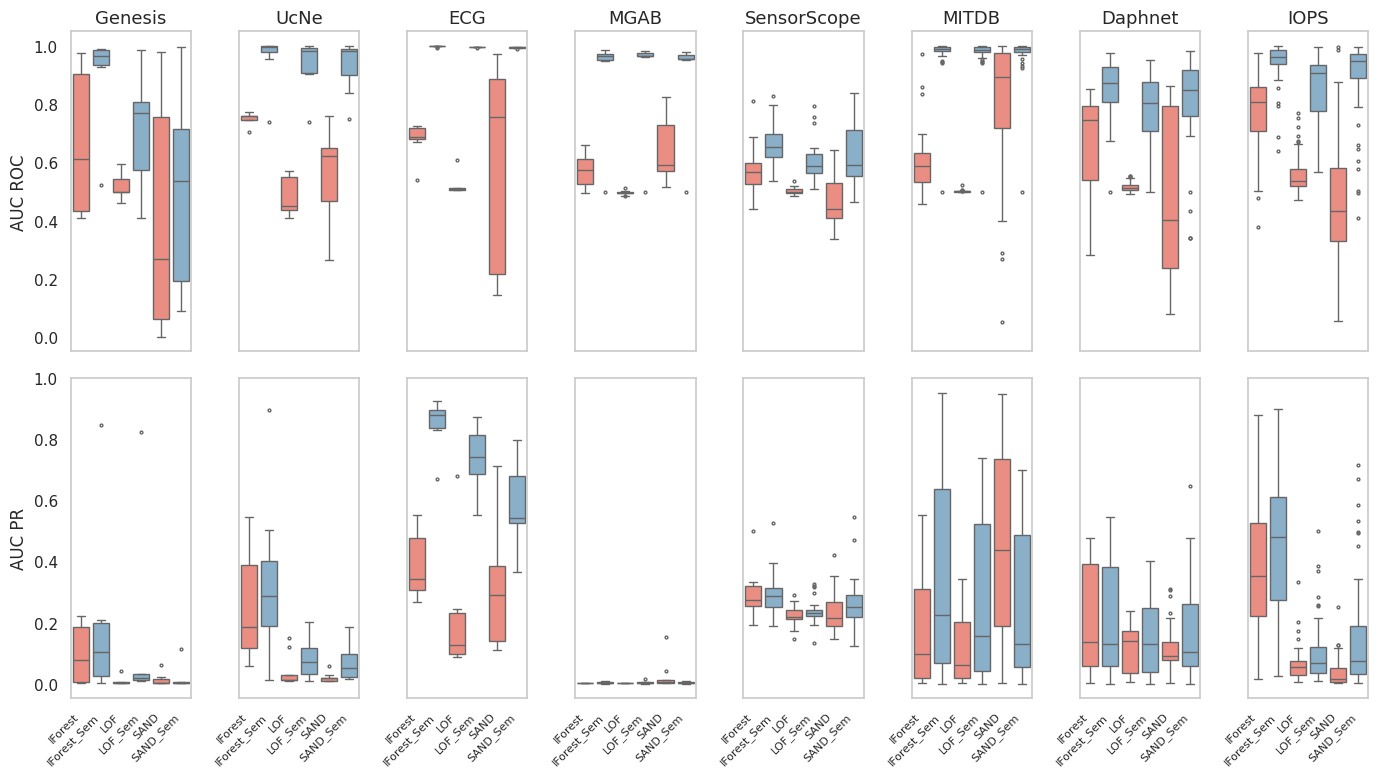

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

sns.set(style="whitegrid")
mpl.rcParams['font.size'] = 14  # global font size

# Simulated ROC data for 3 datasets (each column is a method)
Genesis_ROC = pd.DataFrame({
    'IForest':    [0.9751, 0.40798, 0.95286, 0.46793, 0.42273, 0.75872],
    'IForest_Sem': [0.97864, 0.989, 0.98594, 0.95153, 0.5231, 0.92702],
    'LOF':     [0.59429, 0.55856, 0.46216, 0.5, 0.5, 0.5],
    'LOF_Sem':      [0.74145, 0.98669, 0.80906, 0.40895, 0.79565, 0.5188],
    'SAND':    [0.00213, 0.97793, 0.01399, 0.2098, 0.8962, 0.3283],
    'SAND_Sem':     [0.62372, 0.99635, 0.7467, 0.0915, 0.44901, 0.10667],
})

Genesis_PR = pd.DataFrame({
    'IForest':  [0.19838, 0.2224, 0.14848, 0.00308, 0.00308, 0.00637],
    'IForest_Sem':  [0.20865, 0.84795, 0.17027, 0.03399, 0.00327, 0.02107],
    'LOF':      [0.006, 0.04139, 0.00338, 0.00308, 0.00308, 0.00308],
    'LOF_Sem':      [0.01307, 0.82294, 0.00954, 0.02494, 0.00777, 0.03171],
    'SAND':     [0.00158, 0.06205, 0.00158, 0.00193, 0.02077, 0.00213],
    'SAND_Sem':    [0.00291, 0.11253, 0.00529, 0.00308, 0.00308, 0.00198],

})

ECG_ROC = pd.DataFrame({
    'IForest':    [0.54033, 0.68897, 0.66975, 0.6925, 0.72169, 0.68519, 0.68195, 0.71893, 0.72581],
    'IForest_Sem': [0.99644, 0.99764, 0.99381, 0.99831, 0.99855, 0.99796, 0.99817, 0.99826, 0.99795],
    'LOF':     [0.60955, 0.5103, 0.5052, 0.50871, 0.50686, 0.5047, 0.50976, 0.51267, 0.51364],
    'LOF_Sem':      [0.99542, 0.99573, 0.9923, 0.99658, 0.99684, 0.99699, 0.99687, 0.99672, 0.99512],
    'SAND':    [0.14648, 0.76068, 0.26888, 0.97196, 0.2181, 0.21854, 0.88709, 0.95293, 0.75578],
    'SAND_Sem':     [0.99338, 0.99361, 0.98801, 0.99527, 0.9955, 0.99622, 0.99674, 0.99509, 0.9941],
})

ECG_PR = pd.DataFrame({
    'IForest':  [0.55365, 0.32608, 0.36976, 0.30513, 0.53551, 0.4763, 0.34112, 0.27069, 0.26623],
    'IForest_Sem':  [0.92621, 0.8359, 0.67093, 0.88313, 0.92613, 0.8805, 0.89518, 0.83155, 0.85021],
    'LOF':      [0.68154, 0.12072, 0.1682, 0.09234, 0.24336, 0.23052, 0.12543, 0.09756, 0.0883],
    'LOF_Sem':     [0.8735, 0.74154, 0.55465, 0.72125, 0.81696, 0.79299, 0.81423, 0.68682, 0.55186],
    'SAND':     [0.31493, 0.28952, 0.11247, 0.71385, 0.15652, 0.13882, 0.4646, 0.38662, 0.10973],
    'SAND_Sem':     [0.79701, 0.5437, 0.36521, 0.53868, 0.67427, 0.68063, 0.74625, 0.52745, 0.40348],

})

MGAB_ROC = pd.DataFrame({
    'IForest':    [0.52381, 0.50177, 0.66083, 0.49401, 0.53272, 0.57345, 0.62512, 0.6138, 0.57752, 0.60913],
    'IForest_Sem': [0.94628, 0.97419, 0.98643, 0.94887, 0.96513, 0.5, 0.97441, 0.96326, 0.96857, 0.95691],
    'LOF':    [0.51242, 0.49784, 0.50064, 0.48556, 0.49411, 0.49613, 0.50381, 0.48405, 0.49974, 0.49511],
    'LOF_Sem':  [0.9756, 0.9833, 0.96633, 0.97382, 0.96671, 0.5, 0.96439, 0.98207, 0.96087, 0.96485],
    'SAND':     [0.74024, 0.58237, 0.5671, 0.82543, 0.81147, 0.58747, 0.5169, 0.59355, 0.69428, 0.52979],
    'SAND_Sem':      [0.95115, 0.9554, 0.95605, 0.96654, 0.97693, 0.5, 0.9777, 0.97136, 0.95356, 0.95425],
})

MGAB_PR = pd.DataFrame({
    'IForest':  [0.00218, 0.002, 0.00316, 0.00194, 0.00202, 0.00232, 0.00272, 0.00271, 0.00274, 0.00277],
    'IForest_Sem':  [0.0007, 0.00338, 0.00246, 0.0035, 0.00456, 0.0, 0.0076, 0.00103, 0.00353, 0.00056],
    'LOF':     [0.00222, 0.00198, 0.00251, 0.00192, 0.00198, 0.00215, 0.00227, 0.00189, 0.00205, 0.00216],
    'LOF_Sem':    [0.00312, 0.01592, 0.00122, 0.00577, 0.00487, 0.0, 0.00392, 0.00223, 0.00256, 0.00088],
    'SAND':      [0.00474, 0.01264, 0.00247, 0.15372, 0.00718, 0.00238, 0.00198, 0.00265, 0.00324, 0.04164],
    'SAND_Sem':      [0.00082, 0.00167, 0.0008, 0.00459, 0.00671, 0.0, 0.00691, 0.00138, 0.00231, 0.00054],

})

SensorScope_ROC = pd.DataFrame({
    'IForest':    [0.8115, 0.56567, 0.57357, 0.63566, 0.53533, 0.54539, 0.59645, 0.61944, 0.58804, 0.56026, 0.58792, 0.6012, 0.57427, 0.52826, 0.56458, 0.60459, 0.68783, 0.5212, 0.44695, 0.45557, 0.46888, 0.44154, 0.45024],
    'IForest_Sem': [0.82855, 0.60521, 0.58315, 0.68807, 0.63945, 0.76389, 0.63995, 0.79603, 0.58473, 0.67388, 0.65453, 0.63124, 0.69006, 0.69283, 0.70742, 0.70303, 0.74588, 0.54526, 0.6536, 0.54694, 0.65236, 0.53769, 0.64201],
    'LOF':     
 	            [0.53583, 0.49712, 0.50739, 0.5096, 0.50753, 0.50632, 0.49845, 0.51767, 0.49409, 0.50117, 0.49119, 0.49152, 0.49903, 0.48896, 0.51033, 0.50496, 0.51333, 0.50845, 0.49481, 0.49749, 0.4925, 0.4941, 0.48639],
    'LOF_Sem':      
 	            [0.58952, 0.52525, 0.50799, 0.59558, 0.57054, 0.73374, 0.55197, 0.7947, 0.56593, 0.6221, 0.57523, 0.54615, 0.60983, 0.64898, 0.75583, 0.57476, 0.59627, 0.5297, 0.63459, 0.56362, 0.60957, 0.57895, 0.63573],
    'SAND':    
 	         [0.33615, 0.44054, 0.41474, 0.36401, 0.48301, 0.55872, 0.5207, 0.4249, 0.48714, 0.39224, 0.41156, 0.40779, 0.44125, 0.46713, 0.4318, 0.37641, 0.49684, 0.4005, 0.64336, 0.56576, 0.54058, 0.62567, 0.6209],
    'SAND_Sem':  
 	        [0.69171, 0.53685, 0.52178, 0.6023, 0.56499, 0.81776, 0.61871, 0.83902, 0.57866, 0.593, 0.57572, 0.54854, 0.55763, 0.65944, 0.74923, 0.46534, 0.49017, 0.49709, 0.74093, 0.73125, 0.58414, 0.67482, 0.74462],
})

SensorScope_PR = pd.DataFrame({
    'IForest':  [0.33227, 0.27515, 0.26303, 0.31831, 0.31138, 0.3336, 0.29225, 0.33189, 0.27465, 0.26966, 0.2779, 0.29764, 0.27126, 0.32521, 0.26565, 0.32256, 0.49894, 0.24627, 0.20534, 0.21776, 0.1905, 0.19648, 0.20938],
    'IForest_Sem':  [0.28634, 0.29768, 0.25959, 0.31457, 0.32434, 0.39433, 0.28708, 0.31476, 0.24999, 0.29628, 0.28465, 0.30019, 0.28166, 0.31735, 0.27363, 0.35612, 0.5269, 0.24973, 0.21791, 0.20246, 0.18873, 0.19145, 0.23986],
    'LOF':     
 	            [0.17132, 0.21839, 0.2176, 0.19811, 0.23514, 0.29036, 0.24367, 0.27174, 0.2176, 0.20931, 0.22779, 0.2354, 0.23569, 0.27156, 0.24496, 0.21775, 0.27177, 0.23073, 0.21352, 0.2115, 0.1463, 0.20169, 0.2052],
    'LOF_Sem':  
 	            [0.19053, 0.22467, 0.21897, 0.22086, 0.23276, 0.32711, 0.23098, 0.31743, 0.22642, 0.23637, 0.236, 0.24654, 0.23837, 0.25737, 0.32021, 0.23302, 0.29693, 0.22567, 0.19768, 0.19385, 0.13408, 0.20001, 0.22443],
    'SAND':     
 	        [0.14477, 0.20208, 0.17483, 0.147, 0.24862, 0.41993, 0.24629, 0.28905, 0.21484, 0.19823, 0.19556, 0.19388, 0.20944, 0.30174, 0.21717, 0.17209, 0.35195, 0.18387, 0.32482, 0.23982, 0.15912, 0.26772, 0.26444],
    'SAND_Sem':    
 	        [0.24207, 0.25846, 0.2151, 0.22122, 0.20906, 0.54629, 0.29667, 0.4715, 0.24402, 0.25148, 0.24945, 0.26041, 0.22402, 0.25207, 0.31366, 0.16027, 0.20946, 0.20863, 0.28512, 0.34423, 0.12252, 0.27596, 0.32124],

})

MITDB_ROC = pd.DataFrame({
    'IForest':    
 	    [0.45901, 0.52157, 0.58445, 0.5322, 0.5453, 0.62795, 0.86029, 0.83635, 0.97288, 0.47911, 0.50124, 0.63373, 0.6895, 0.53003, 0.49294, 0.59912, 0.56685, 0.63343, 0.59354, 0.66377, 0.62865, 0.60751, 0.56862, 0.56595, 0.66763, 0.69876, 0.58053, 0.58827, 0.60428, 0.54194, 0.51133, 0.48293],
    'IForest_Sem': 
 	    [0.99622, 0.99164, 0.98433, 0.96662, 0.98428, 0.99151, 0.98527, 0.98425, 0.99547, 0.98471, 0.98272, 0.98934, 0.99063, 0.99585, 0.99795, 0.99089, 0.5, 0.9883, 0.99558, 0.99162, 0.99717, 0.9971, 0.94594, 0.94835, 0.99514, 0.99975, 0.97935, 0.94191, 0.99287, 0.99551, 0.97971, 0.99923],
    'LOF':     
 	     [0.5011, 0.50062, 0.50126, 0.49945, 0.50327, 0.50675, 0.49959, 0.50324, 0.52306, 0.50023, 0.50051, 0.50053, 0.5019, 0.50043, 0.50135, 0.50137, 0.49965, 0.49965, 0.50141, 0.50056, 0.50443, 0.50062, 0.50062, 0.50012, 0.50042, 0.50064, 0.50016, 0.50017, 0.50025, 0.50042, 0.49966, 0.50289],
    'LOF_Sem':      
    	 [0.99462, 0.9963, 0.98312, 0.96677, 0.98548, 0.98559, 0.99179, 0.95832, 0.94858, 0.98642, 0.98193, 0.9866, 0.98845, 0.99565, 0.99781, 0.98633, 0.5, 0.9868, 0.99254, 0.98161, 0.99706, 0.99623, 0.94182, 0.95394, 0.99404, 0.99873, 0.97707, 0.94434, 0.9924, 0.99483, 0.97937, 0.99791],
    'SAND':    
 	    [0.97116, 0.92617, 0.87138, 0.93024, 0.99765, 0.99527, 0.79245, 0.29079, 0.55539, 0.87725, 0.85035, 0.05458, 0.99499, 0.86491, 0.69782, 0.98618, 0.39938, 0.62529, 0.81465, 0.91357, 0.99562, 0.97984, 0.80015, 0.4044, 0.72486, 0.26986, 0.96172, 0.907, 0.95725, 0.97354, 0.98488, 0.97815],
    'SAND_Sem':     
 	    [0.99496, 0.99563, 0.98614, 0.97956, 0.9803, 0.97682, 0.98887, 0.96915, 0.93116, 0.98614, 0.9801, 0.9866, 0.99171, 0.99571, 0.99768, 0.9911, 0.5, 0.99113, 0.98933, 0.97643, 0.99594, 0.99686, 0.92487, 0.94034, 0.99306, 0.99863, 0.97976, 0.95381, 0.99077, 0.99437, 0.98015, 0.99697],
})

MITDB_PR = pd.DataFrame({
    'IForest':  
 	     [0.01672, 0.0194, 0.04903, 0.03922, 0.02605, 0.09695, 0.002, 0.0068, 0.02389, 0.05779, 0.06249, 0.51861, 0.00213, 0.31967, 0.30667, 0.14731, 0.0004, 0.00054, 0.33222, 0.48727, 0.15873, 0.09943, 0.12469, 0.12135, 0.35708, 0.55296, 0.30189, 0.2984, 0.45873, 0.37336, 0.01622, 0.01739],
    'IForest_Sem':  
 	    [0.12296, 0.06986, 0.08533, 0.03798, 0.15053, 0.30096, 0.00275, 0.02468, 0.06268, 0.08824, 0.10075, 0.74334, 0.01017, 0.59799, 0.75991, 0.37784, 0.0, 0.00073, 0.73418, 0.79547, 0.68003, 0.24137, 0.20685, 0.15898, 0.63759, 0.95351, 0.4857, 0.36465, 0.66015, 0.63561, 0.01691, 0.50224],
    'LOF':      
 	    [0.01864, 0.01843, 0.03587, 0.03544, 0.0193, 0.02468, 0.00057, 0.00079, 0.00187, 0.06115, 0.06124, 0.32034, 0.00088, 0.27735, 0.27904, 0.09914, 0.00036, 0.00036, 0.19924, 0.19793, 0.07316, 0.05919, 0.103, 0.10264, 0.20223, 0.20322, 0.24161, 0.24193, 0.34361, 0.34373, 0.01584, 0.01761],
    'LOF_Sem':      
 	    [0.05941, 0.03885, 0.0788, 0.0409, 0.14108, 0.15586, 0.00462, 0.00655, 0.00711, 0.09713, 0.08256, 0.64231, 0.00829, 0.53711, 0.6251, 0.26924, 0.0, 0.00088, 0.51803, 0.56739, 0.48966, 0.15617, 0.17044, 0.17896, 0.59011, 0.73807, 0.47125, 0.3895, 0.64198, 0.58563, 0.0162, 0.07556],
    'SAND':     
 	    [0.35065, 0.19018, 0.11317, 0.58919, 0.90393, 0.86499, 0.00249, 0.00041, 0.00066, 0.34458, 0.23445, 0.18266, 0.51712, 0.77918, 0.53431, 0.89045, 0.00029, 0.00048, 0.65642, 0.6886, 0.92575, 0.70781, 0.47534, 0.20317, 0.36282, 0.14343, 0.90541, 0.72278, 0.90643, 0.94878, 0.39715, 0.40226],
    'SAND_Sem':    
 	    [0.06296, 0.02741, 0.09493, 0.11206, 0.0964, 0.08657, 0.00348, 0.00985, 0.0039, 0.10471, 0.06479, 0.61572, 0.00977, 0.54321, 0.615, 0.38622, 0.0, 0.00103, 0.382, 0.47942, 0.34018, 0.22393, 0.12612, 0.13243, 0.53024, 0.6994, 0.49607, 0.4824, 0.57189, 0.58467, 0.01792, 0.18602],

})

Daphnet_ROC = pd.DataFrame({
     'IForest':  
 	    [0.54051, 0.51442, 0.59807, 0.63884, 0.67233, 0.59031, 0.77142, 0.81486, 0.76017, 0.70929, 0.76778, 0.74727, 0.81616, 0.7596, 0.7467, 0.82268, 0.85161, 0.79354, 0.8499, 0.85197, 0.81494, 0.80857, 0.7269, 0.69227, 0.81431, 0.77821, 0.74734, 0.71092, 0.28207, 0.44659, 0.50803, 0.46833, 0.47631, 0.52999, 0.46173, 0.48633, 0.52822, 0.48024, 0.82438, 0.79333, 0.69227, 0.81431, 0.77821, 0.74734, 0.71092],
    'IForest_Sem':  
 	    [0.90821, 0.87413, 0.82031, 0.88407, 0.8057, 0.8079, 0.92302, 0.93831, 0.92662, 0.93732, 0.92273, 0.94394, 0.94027, 0.93536, 0.94973, 0.89167, 0.92678, 0.91322, 0.91476, 0.89823, 0.90996, 0.97415, 0.86373, 0.7778, 0.77935, 0.86174, 0.83008, 0.83761, 0.5, 0.78728, 0.81175, 0.85206, 0.77438, 0.94877, 0.71589, 0.77473, 0.91272, 0.67357, 0.92662, 0.96513, 0.7778, 0.77935, 0.86174, 0.83008, 0.83761],
    'LOF':     
 	    [0.4946, 0.50239, 0.50564, 0.50978, 0.51324, 0.50281, 0.50469, 0.50754, 0.5045, 0.50528, 0.50726, 0.5146, 0.51181, 0.51379, 0.50449, 0.52088, 0.54986, 0.51869, 0.54563, 0.52205, 0.52562, 0.52416, 0.51241, 0.55259, 0.54604, 0.52378, 0.52142, 0.51486, 0.5, 0.49958, 0.52372, 0.50631, 0.49659, 0.49215, 0.49855, 0.49676, 0.50991, 0.50481, 0.49664, 0.4998, 0.55259, 0.54604, 0.52378, 0.52142, 0.51486],
    'LOF_Sem':  
 	    [0.88523, 0.84088, 0.7745, 0.84703, 0.74646, 0.74501, 0.81919, 0.9113, 0.85773, 0.88559, 0.89411, 0.89154, 0.91609, 0.81187, 0.91013, 0.83557, 0.88265, 0.69996, 0.66064, 0.79105, 0.65711, 0.93932, 0.85643, 0.66879, 0.72526, 0.71344, 0.69005, 0.68437, 0.5, 0.81092, 0.80516, 0.8646, 0.7675, 0.94828, 0.72807, 0.80555, 0.8767, 0.70854, 0.70165, 0.95281, 0.66879, 0.72526, 0.71344, 0.69005, 0.68437],
    'SAND':    
 	     [0.79307, 0.86299, 0.8497, 0.82518, 0.67408, 0.81118, 0.18402, 0.23896, 0.22271, 0.18221, 0.18582, 0.58433, 0.18306, 0.14611, 0.20846, 0.24633, 0.16148, 0.65566, 0.28284, 0.26728, 0.09822, 0.15852, 0.40294, 0.39415, 0.37817, 0.42529, 0.69369, 0.35838, 0.35734, 0.78179, 0.84921, 0.85713, 0.83521, 0.79553, 0.84501, 0.82168, 0.73951, 0.80838, 0.52281, 0.07994, 0.30177, 0.5662, 0.4176, 0.40232, 0.31483],
    'SAND_Sem':   
 	    [0.89946, 0.93426, 0.82229, 0.87975, 0.80842, 0.94552, 0.91891, 0.88836, 0.76031, 0.81583, 0.86541, 0.94236, 0.8806, 0.78884, 0.86015, 0.77246, 0.84881, 0.91617, 0.33957, 0.69059, 0.43478, 0.93548, 0.90636, 0.34093, 0.8942, 0.7977, 0.98257, 0.78575, 0.5, 0.75292, 0.89389, 0.93223, 0.75659, 0.9603, 0.71721, 0.74957, 0.70194, 0.81676, 0.95349, 0.9418, 0.34093, 0.8942, 0.7977, 0.98257, 0.78575],
})

Daphnet_PR = pd.DataFrame({
    'IForest':  
 	     [0.05458, 0.05605, 0.07566, 0.21919, 0.22789, 0.17458, 0.32322, 0.33643, 0.31889, 0.30328, 0.42079, 0.44373, 0.47815, 0.43043, 0.42586, 0.3647, 0.43262, 0.34437, 0.42503, 0.44914, 0.42713, 0.39393, 0.26896, 0.06791, 0.08231, 0.08387, 0.06167, 0.05648, 0.00288, 0.13488, 0.03749, 0.03101, 0.03088, 0.03639, 0.03115, 0.03149, 0.0383, 0.03252, 0.391, 0.40325, 0.06791, 0.08231, 0.08387, 0.06167, 0.05648],
    'IForest_Sem':  
 	    [0.04016, 0.05371, 0.09016, 0.29367, 0.27419, 0.17373, 0.33434, 0.3389, 0.36923, 0.30511, 0.41485, 0.43934, 0.49038, 0.52872, 0.38307, 0.38352, 0.47546, 0.36283, 0.47449, 0.47884, 0.50345, 0.54621, 0.30106, 0.07639, 0.06994, 0.09598, 0.06521, 0.0574, 0.0, 0.12847, 0.03971, 0.06134, 0.03577, 0.03839, 0.03696, 0.02337, 0.05039, 0.03487, 0.34602, 0.38544, 0.07639, 0.06994, 0.09598, 0.06521, 0.0574],
    'LOF':      
 	     [0.05379, 0.05411, 0.05519, 0.14616, 0.14703, 0.13906, 0.15298, 0.15446, 0.15279, 0.15354, 0.23221, 0.23684, 0.2374, 0.23471, 0.2242, 0.17179, 0.18488, 0.1608, 0.17942, 0.17073, 0.1814, 0.16626, 0.14722, 0.04538, 0.04079, 0.03181, 0.02951, 0.02976, 0.0036, 0.14948, 0.03604, 0.03479, 0.03376, 0.0332, 0.03383, 0.03379, 0.03636, 0.03411, 0.20659, 0.20729, 0.04538, 0.04079, 0.03181, 0.02951, 0.02976],
    'LOF_Sem':  
 	     [0.03526, 0.03726, 0.06215, 0.23736, 0.22621, 0.14239, 0.1824, 0.25848, 0.24542, 0.14906, 0.32111, 0.27689, 0.40267, 0.30425, 0.22155, 0.27201, 0.2989, 0.1978, 0.21632, 0.28767, 0.18694, 0.29374, 0.24823, 0.045, 0.04118, 0.05019, 0.04487, 0.03246, 0.0, 0.13, 0.03433, 0.05738, 0.03683, 0.0367, 0.03864, 0.0301, 0.03649, 0.03799, 0.26932, 0.32823, 0.045, 0.04118, 0.05019, 0.04487, 0.03246],
    'SAND':     
 	    [0.11597, 0.19575, 0.1557, 0.31072, 0.17841, 0.28737, 0.08826, 0.09378, 0.09217, 0.0887, 0.13509, 0.23161, 0.13482, 0.12922, 0.1375, 0.08801, 0.07952, 0.17475, 0.09189, 0.08962, 0.07622, 0.08144, 0.10588, 0.02161, 0.02104, 0.02276, 0.04179, 0.02019, 0.00268, 0.30593, 0.09865, 0.09909, 0.08868, 0.07623, 0.09151, 0.08061, 0.10583, 0.0832, 0.21571, 0.11641, 0.01959, 0.02979, 0.02285, 0.02217, 0.01901],
    'SAND_Sem':    
 	     [0.03324, 0.10028, 0.07277, 0.27305, 0.23375, 0.64703, 0.31889, 0.1767, 0.12213, 0.05898, 0.22326, 0.4139, 0.26198, 0.21759, 0.11223, 0.17317, 0.20414, 0.35313, 0.07025, 0.16721, 0.07345, 0.23435, 0.32504, 0.01911, 0.08058, 0.05646, 0.38588, 0.03676, 0.0, 0.09404, 0.10253, 0.27383, 0.0422, 0.05139, 0.03506, 0.05496, 0.0214, 0.06292, 0.47847, 0.2665, 0.01911, 0.08058, 0.05646, 0.38588, 0.03676],
})

IOPS_ROC = pd.DataFrame({
    'IForest':    
 	 [0.88164, 0.56093, 0.73837, 0.82308, 0.80203, 0.97443, 0.71006, 0.80802, 0.7249, 0.96844, 0.76495, 0.73956, 0.76554, 0.84909, 0.8086, 0.95755, 0.82365, 0.81887, 0.7817, 0.62167, 0.60609, 0.563, 0.81861, 0.92905, 0.6625, 0.7771, 0.67388, 0.683, 0.64785, 0.67415, 0.84427, 0.95558, 0.89426, 0.82205, 0.90085, 0.90372, 0.78809, 0.79852, 0.83251, 0.92144, 0.60095, 0.70508, 0.86348, 0.81671, 0.77659, 0.53862, 0.73367, 0.85659, 0.8583, 0.50109, 0.47721, 0.3788, 0.84399, 0.87226, 0.84006, 0.95359, 0.81839, 0.96437],
    'IForest_Sem': 
 	 [0.98267, 0.95024, 0.96625, 0.90858, 0.98069, 0.97753, 0.85492, 0.97304, 0.9814, 0.99472, 0.98481, 0.98103, 0.99317, 0.96293, 0.96139, 0.98722, 0.99573, 0.99166, 0.98712, 0.93207, 0.93687, 0.9255, 0.79521, 0.95717, 0.80548, 0.8919, 0.99033, 0.98028, 0.97198, 0.98073, 0.96284, 0.98705, 0.96836, 0.90886, 0.94335, 0.91425, 0.96675, 0.95182, 0.88337, 0.95299, 0.63866, 0.68721, 0.996, 0.99143, 0.98615, 0.95216, 0.96279, 0.93828, 0.95992, 0.89782, 0.99256, 0.99864, 0.95875, 0.97245, 0.9953, 0.9623, 0.95709, 0.89657],
    'LOF':     
 	 [0.59445, 0.51999, 0.5363, 0.59152, 0.53428, 0.53192, 0.55452, 0.56834, 0.51251, 0.51415, 0.53327, 0.57561, 0.555, 0.5719, 0.5808, 0.5307, 0.57195, 0.60806, 0.51831, 0.50885, 0.56877, 0.5129, 0.51468, 0.50725, 0.5689, 0.57849, 0.67472, 0.6648, 0.51167, 0.50777, 0.55552, 0.52694, 0.72281, 0.68945, 0.77087, 0.67045, 0.52553, 0.47263, 0.5617, 0.54061, 0.52542, 0.53711, 0.5623, 0.58651, 0.51985, 0.49186, 0.55333, 0.59339, 0.61808, 0.75286, 0.51765, 0.52752, 0.49039, 0.51047, 0.53388, 0.52186, 0.50906, 0.51089],
    'LOF_Sem':  
 	 [0.95037, 0.95753, 0.91256, 0.71827, 0.93221, 0.57511, 0.65639, 0.89116, 0.9218, 0.95312, 0.90962, 0.95758, 0.96736, 0.83205, 0.82174, 0.68719, 0.9698, 0.93255, 0.92095, 0.87447, 0.90371, 0.96664, 0.66523, 0.61345, 0.62406, 0.71882, 0.91656, 0.89288, 0.9155, 0.96488, 0.84101, 0.76839, 0.87201, 0.80218, 0.94534, 0.86292, 0.90525, 0.82482, 0.71715, 0.73084, 0.56801, 0.57065, 0.96838, 0.93336, 0.91435, 0.90889, 0.92831, 0.68415, 0.88952, 0.93512, 0.99226, 0.99744, 0.88065, 0.93118, 0.94404, 0.92402, 0.67617, 0.9553],
    'SAND':    
 	 [0.83602, 0.43729, 0.43193, 0.2028, 0.37358, 0.49711, 0.42737, 0.26094, 0.43613, 0.50943, 0.45644, 0.36238, 0.473, 0.5315, 0.47681, 0.66968, 0.27359, 0.26296, 0.50994, 0.48179, 0.63868, 0.39155, 0.32671, 0.28297, 0.35423, 0.29529, 0.29565, 0.06701, 0.55909, 0.4071, 0.69427, 0.24375, 0.44467, 0.27218, 0.98445, 0.99524, 0.39942, 0.3538, 0.05581, 0.25988, 0.62492, 0.74224, 0.33643, 0.20056, 0.58845, 0.42454, 0.40428, 0.24936, 0.7402, 0.87674, 0.47783, 0.50359, 0.77112, 0.60187, 0.36603, 0.63544, 0.67696, 0.41759],
    'SAND_Sem': 
 	 [0.92435, 0.94067, 0.98739, 0.84166, 0.98024, 0.49488, 0.9762, 0.93558, 0.86798, 0.99028, 0.96621, 0.9695, 0.97685, 0.91182, 0.97628, 0.95448, 0.96596, 0.88914, 0.93764, 0.94958, 0.8474, 0.94945, 0.92889, 0.60605, 0.95862, 0.92978, 0.99548, 0.99499, 0.95462, 0.97136, 0.97314, 0.96545, 0.79024, 0.57919, 0.9883, 0.98935, 0.92728, 0.94385, 0.41126, 0.64534, 0.5013, 0.6601, 0.97896, 0.96611, 0.94123, 0.94897, 0.95888, 0.72717, 0.81878, 0.84621, 0.99383, 0.99722, 0.92279, 0.89678, 0.97953, 0.89023, 0.90481, 0.95968],
})

IOPS_PR = pd.DataFrame({
    'IForest':  
 	 [0.22877, 0.08071, 0.36245, 0.55707, 0.52914, 0.60195, 0.24567, 0.41693, 0.42445, 0.49876, 0.18137, 0.06227, 0.21782, 0.52151, 0.34166, 0.87814, 0.39912, 0.63505, 0.36505, 0.04757, 0.09077, 0.01443, 0.45325, 0.57164, 0.22634, 0.26162, 0.31241, 0.27638, 0.17261, 0.02574, 0.44534, 0.87933, 0.57102, 0.32119, 0.75981, 0.77951, 0.19394, 0.63286, 0.29444, 0.53913, 0.06046, 0.17731, 0.48281, 0.63035, 0.37392, 0.02054, 0.32651, 0.62612, 0.2699, 0.27823, 0.09159, 0.06688, 0.25823, 0.26532, 0.56964, 0.50664, 0.45953, 0.45696],
    'IForest_Sem':  
 	 [0.26234, 0.07256, 0.61044, 0.60079, 0.4799, 0.61459, 0.274, 0.68309, 0.35277, 0.6226, 0.55037, 0.15567, 0.3596, 0.60997, 0.42257, 0.90084, 0.6497, 0.88197, 0.57755, 0.13393, 0.10457, 0.02601, 0.17914, 0.5681, 0.22988, 0.33307, 0.46204, 0.4788, 0.55178, 0.11695, 0.52451, 0.88393, 0.54993, 0.33582, 0.73883, 0.77101, 0.30826, 0.7433, 0.29077, 0.49783, 0.0591, 0.15029, 0.64694, 0.8711, 0.51707, 0.0251, 0.5565, 0.67396, 0.22783, 0.28224, 0.35271, 0.61294, 0.27614, 0.32667, 0.7956, 0.45776, 0.54311, 0.21455],
    'LOF':      
 	 [0.20215, 0.11674, 0.01869, 0.0546, 0.05106, 0.0864, 0.02039, 0.04909, 0.0275, 0.06448, 0.00647, 0.00495, 0.06427, 0.05572, 0.04914, 0.08898, 0.07764, 0.08551, 0.05074, 0.02742, 0.06755, 0.0134, 0.03401, 0.07057, 0.01636, 0.04598, 0.02724, 0.01432, 0.006, 0.00441, 0.0532, 0.08072, 0.09553, 0.07049, 0.07005, 0.06728, 0.02621, 0.04818, 0.02416, 0.05473, 0.06148, 0.14602, 0.07601, 0.07755, 0.0582, 0.01721, 0.01875, 0.05795, 0.17107, 0.33427, 0.09367, 0.07748, 0.01422, 0.03187, 0.03534, 0.069, 0.03107, 0.058],
    'LOF_Sem':  
 	 [0.00839, 0.50122, 0.04036, 0.08322, 0.09246, 0.07463, 0.05626, 0.09448, 0.1003, 0.14153, 0.01521, 0.02029, 0.10341, 0.09528, 0.04299, 0.12059, 0.14472, 0.11269, 0.10279, 0.0205, 0.07027, 0.04394, 0.02959, 0.03896, 0.0107, 0.02612, 0.07909, 0.08771, 0.01273, 0.01612, 0.04105, 0.11493, 0.04657, 0.01701, 0.37017, 0.2152, 0.06396, 0.13346, 0.02771, 0.06676, 0.02588, 0.06593, 0.12435, 0.17046, 0.10192, 0.00974, 0.03642, 0.03586, 0.05943, 0.03501, 0.16882, 0.38423, 0.04399, 0.25898, 0.16799, 0.25325, 0.05153, 0.28432],
    'SAND':     
 	 [0.04991, 0.00153, 0.00338, 0.00413, 0.01675, 0.05158, 0.00523, 0.00849, 0.02353, 0.04985, 0.0044, 0.00179, 0.05542, 0.12605, 0.01302, 0.12665, 0.00787, 0.00592, 0.0463, 0.02366, 0.05251, 0.00977, 0.02166, 0.05477, 0.00373, 0.00497, 0.00042, 0.00044, 0.00711, 0.00574, 0.05442, 0.03523, 0.05839, 0.00502, 0.01283, 0.11793, 0.01601, 0.04316, 0.00877, 0.02411, 0.02256, 0.09985, 0.00779, 0.00551, 0.05659, 0.01389, 0.00377, 0.00363, 0.01279, 0.00682, 0.07465, 0.06139, 0.24996, 0.01244, 0.02096, 0.10001, 0.04595, 0.04177],
    'SAND_Sem':  
 	 [0.00359, 0.00325, 0.16203, 0.15211, 0.53124, 0.15681, 0.11015, 0.04749, 0.27951, 0.71643, 0.0324, 0.01177, 0.08323, 0.29476, 0.18849, 0.67143, 0.08068, 0.03015, 0.05956, 0.04072, 0.02963, 0.01173, 0.11037, 0.0879, 0.08605, 0.22777, 0.1443, 0.06821, 0.0161, 0.01344, 0.2991, 0.58381, 0.0284, 0.00745, 0.0173, 0.05696, 0.04088, 0.49764, 0.01354, 0.04598, 0.01719, 0.09132, 0.16693, 0.20932, 0.06117, 0.0176, 0.03164, 0.04492, 0.03702, 0.00178, 0.34219, 0.17647, 0.06068, 0.04234, 0.495, 0.19445, 0.18866, 0.4516],

})

UcNe_ROC = pd.DataFrame({
    'IForest':    
 	 [0.76061, 0.76146, 0.76065, 0.74615, 0.70546, 0.77277, 0.7606, 0.76014, 0.74715],
    'IForest_Sem': 
 	 [0.99474, 0.99773, 0.989, 0.95524, 0.97856, 0.73917, 0.99593, 0.99875, 0.99904],
    'LOF':     
 	 [0.43797, 0.4434, 0.45776, 0.42687, 0.45025, 0.57011, 0.40924, 0.55052, 0.56137],
    'LOF_Sem':      
 	 [0.9871, 0.99121, 0.90539, 0.92034, 0.90454, 0.7374, 0.9839, 0.99185, 0.9986],
    'SAND':    
 	 [0.46801, 0.75908, 0.62352, 0.50671, 0.68095, 0.65113, 0.64797, 0.31304, 0.26717],
    'SAND_Sem':     
 	 [0.98269, 0.98683, 0.89928, 0.93116, 0.83863, 0.74824, 0.98755, 0.99476, 0.999],
})

UcNe_PR = pd.DataFrame({
    'IForest':  
 	 [0.11503, 0.38765, 0.18434, 0.05699, 0.15313, 0.54452, 0.26448, 0.50947, 0.0768],
    'IForest_Sem':  
 	 [0.1881, 0.50414, 0.36609, 0.07263, 0.28716, 0.0108, 0.2406, 0.89678, 0.40105],
    'LOF':      
 	 [0.00964, 0.01005, 0.01036, 0.01293, 0.0102, 0.11915, 0.00945, 0.02847, 0.14898],
    'LOF_Sem':      
 	 [0.11559, 0.17422, 0.02007, 0.04658, 0.03113, 0.00978, 0.06991, 0.20153, 0.10856],
    'SAND':     
 	 [0.00998, 0.05615, 0.01693, 0.0111, 0.02883, 0.01727, 0.01964, 0.00735, 0.00711],
    'SAND_Sem':    
 	 [0.06804, 0.09807, 0.02151, 0.05099, 0.01836, 0.01328, 0.05101, 0.18397, 0.12169],
})




# Color palette: grouped by method type
color_palette = sns.color_palette("Set3")
palette = [color_palette[3], color_palette[4], color_palette[3], color_palette[4], color_palette[3], color_palette[4]]

# Create figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 8, figsize=(14, 8), sharey='row')

dataset_names = [ 'Genesis', 'UcNe', 'ECG','MGAB', 'SensorScope',  'MITDB', 'Daphnet', 'IOPS', 'Synthetic']
roc_data_list = [Genesis_ROC, UcNe_ROC, ECG_ROC, MGAB_ROC, SensorScope_ROC, MITDB_ROC, Daphnet_ROC, IOPS_ROC, ]
pr_data_list = [Genesis_PR, UcNe_PR, ECG_PR, MGAB_PR, SensorScope_PR, MITDB_PR, Daphnet_PR, IOPS_PR]

# --- Top Row: ROC Boxplots ---
for i, ax in enumerate(axs[0]):
    sns.boxplot(data=roc_data_list[i], palette=palette, fliersize=2, orient='v', ax=ax)
    ax.set_title(f'{dataset_names[i]}', fontsize=13)
    ax.set_xticklabels("", rotation=45, ha='right')
    ax.set_ylabel('AUC ROC' if i == 0 else '')
    ax.tick_params(labelsize=11)
    ax.grid(False)


# --- Bottom Row: PR Boxplots ---
for i, ax in enumerate(axs[1]):
    sns.boxplot(data=pr_data_list[i], palette=palette, fliersize=2, orient='v', ax=ax)
    # ax.set_title(f' {dataset_names[i]}', fontsize=13)
    ax.set_xticklabels(pr_data_list[i].columns, rotation=45, ha='right', fontsize=11)
    ax.set_ylabel('AUC PR' if i == 0 else '')
    ax.tick_params(labelsize=11)
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=8)



# plt.grid("False")
plt.tight_layout()
plt.savefig('/home/guoyou/AUC.pdf', format='pdf')
plt.show()

### Varying SNR

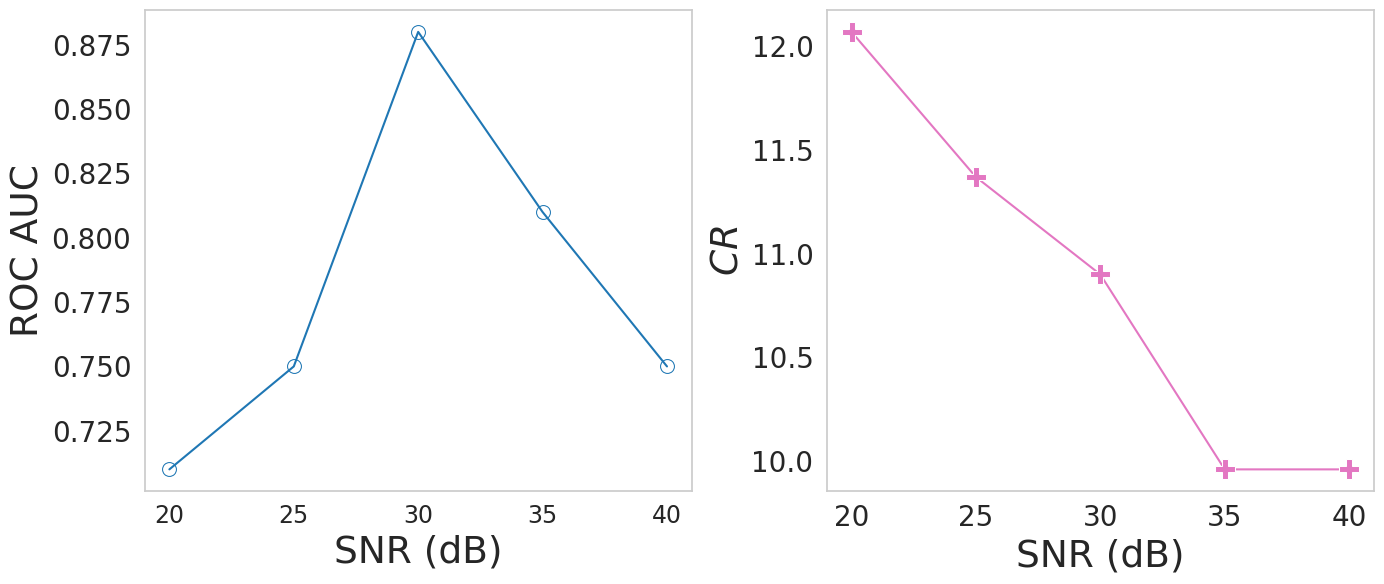

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 使用 Seaborn 风格
sns.set(style="whitegrid")
color_palette = sns.color_palette('tab10')
# color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], 'skyblue', 'lightcoral']
palette = [color_palette[2], color_palette[3]]

# 示例数据
x =  [20,   25,   30,   35,   40]
y1 = [0.71, 0.75, 0.88, 0.81, 0.75]
y2 = [12.07, 11.37,10.90,9.96, 9.96 ]

# 创建一个图形和两个子图，水平排列
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 行, 2 列

# 第一个子图 - 正弦波
sns.lineplot(x=x, y=y1, ax=axes[0], color=color_palette[0], marker='o', markersize=10, markerfacecolor='none', markeredgecolor=color_palette[0])
axes[0].set_xlabel('SNR (dB)', fontsize=27)
axes[0].set_ylabel('ROC AUC', fontsize=27)
axes[0].set_xticks(x)  # 设置X轴刻度
axes[0].tick_params(axis='y', labelsize=20)  # 设置y轴刻度字体大小
axes[0].tick_params(axis='x', labelsize=17)  # 设置y轴刻度字体大小

# 第二个子图 - 余弦波
sns.lineplot(x=x, y=y2, ax=axes[1], color=color_palette[6], marker='P', markersize=15)
axes[1].set_xlabel('SNR (dB)', fontsize=27)
axes[1].set_ylabel(r'$CR$', fontsize=27)
axes[1].set_xticks(x)  # 设置X轴刻度
axes[1].tick_params(axis='y', labelsize=20)  # 设置y轴刻度字体大小
axes[1].tick_params(axis='x', labelsize=20)  # 设置y轴刻度字体大小



# 调整布局以防止重叠
plt.tight_layout()
axes[0].grid(False)
axes[1].grid(False)

pdf_filename = "/home/guoyou/SHRINK/Figures/varingSNR.pdf"
plt.savefig(pdf_filename, format='pdf')
plt.show()


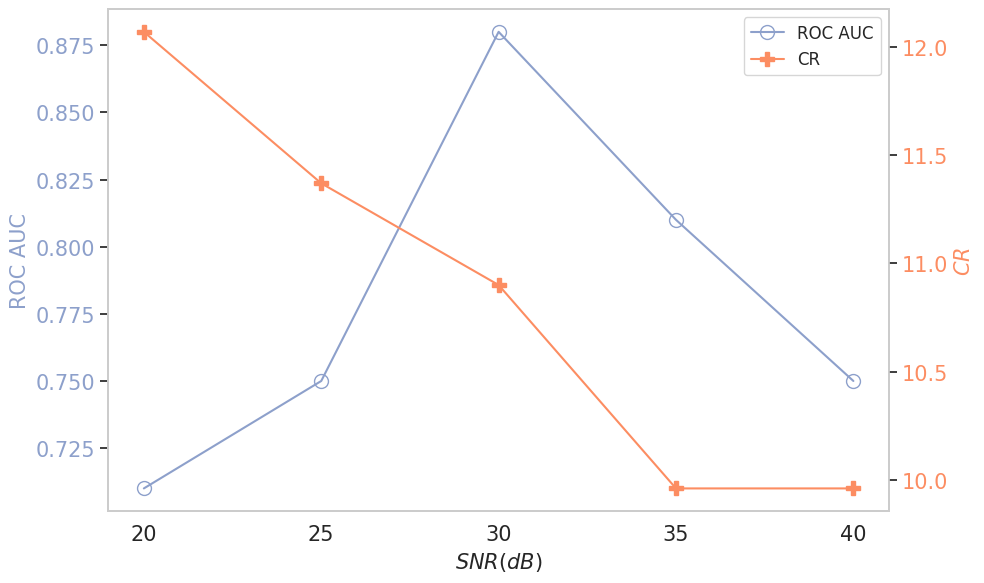

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
color_palette = sns.color_palette('Set2')

# Data
x = [20, 25, 30, 35, 40]
y1 = [0.71, 0.75, 0.88, 0.81, 0.75]         # ROC AUC
y2 = [12.07, 11.37, 10.90, 9.96, 9.96]      # Compression Ratio (CR)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot ROC AUC on primary y-axis
color1 = color_palette[2]
line1 = ax1.plot(x, y1, marker='o', label='ROC AUC', color=color1, markersize=10, markerfacecolor='none')
ax1.set_xlabel('$SNR (dB)$', fontsize=15)
ax1.set_ylabel('ROC AUC', color=color1, fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_xticks(x)
ax1.grid(False)

# Create secondary y-axis
ax2 = ax1.twinx()
color2 = color_palette[1]
line2 = ax2.plot(x, y2, marker='P', label='CR', color=color2, markersize=10)
ax2.set_ylabel('$CR$', color=color2, fontsize=15)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=15)
ax2.grid(False)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels,  fontsize=12)

# Layout and save
plt.tight_layout()
plt.savefig("/home/guoyou/SHRINK/Figures/varingSNR.pdf", format='pdf')
plt.show()


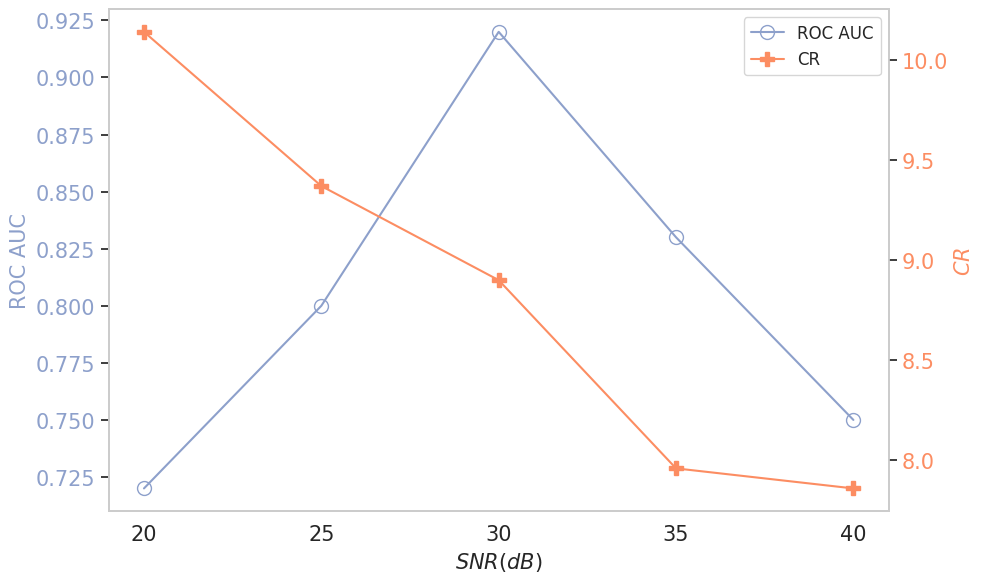

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
color_palette = sns.color_palette('Set2')

# Data
x = [20, 25, 30, 35, 40]
y1 = [0.72, 0.80, 0.92, 0.83, 0.75]         # ROC AUC
y2 = [10.14, 9.37, 8.90, 7.96, 7.86]      # Compression Ratio (CR)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot ROC AUC on primary y-axis
color1 = color_palette[2]
line1 = ax1.plot(x, y1, marker='o', label='ROC AUC', color=color1, markersize=10, markerfacecolor='none')
ax1.set_xlabel('$SNR (dB)$', fontsize=15)
ax1.set_ylabel('ROC AUC', color=color1, fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_xticks(x)
ax1.grid(False)

# Create secondary y-axis
ax2 = ax1.twinx()
color2 = color_palette[1]
line2 = ax2.plot(x, y2, marker='P', label='CR', color=color2, markersize=10)
ax2.set_ylabel('$CR$', color=color2, fontsize=15)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=15)
ax2.grid(False)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels,  fontsize=12)

# Layout and save
plt.tight_layout()
plt.savefig("/home/guoyou/SHRINK/Figures/varingSNR.pdf", format='pdf')
plt.show()


### Entorpy and SNR

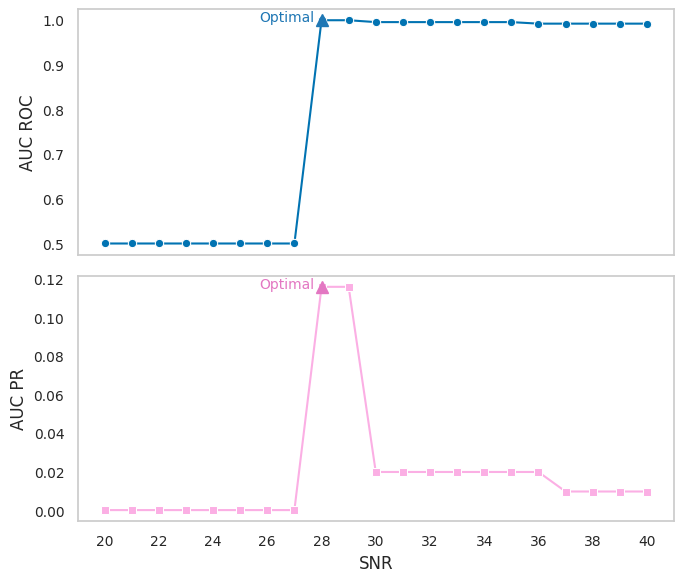

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

# Reconstruct the data from the image manually
data = {
    'SNR': list(range(20, 41)),
    'AUC_ROC': [0.49998,0.49998,0.49998,0.49998,0.49998,0.49998, 0.49998, 0.49998, 0.99866, 0.99866, 0.99448, 0.99448, 0.99448, 0.99448, 0.99448, 0.99448,0.99105,0.99105,0.99105,0.99105,0.99105],
    'AUC_PR': [0.00002,0.00002,0.00002,0.00002,0.00002,0.00002, 0.00002, 0.00002, 0.11573, 0.11573, 0.01977, 0.01977, 0.01977, 0.01977, 0.01977, 0.01977,0.01977, 0.00965, 0.00965, 0.00965, 0.00965]
}

df = pd.DataFrame(data)
color_palette = sns.color_palette("tab10")

# Set the seaborn theme for academic style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'lines.linewidth': 1.5,
    'lines.markersize': 6
})

# Create the same subplots but with a vertical marker at SNR=25 labeled "Optimal"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# Plot AUC_ROC
sns.lineplot(x='SNR', y='AUC_ROC', data=df, ax=ax1, color=sns.color_palette("colorblind")[0], marker='o')
ax1.set_ylabel('AUC ROC')
# ax1.set_title('AUC ROC vs. SNR')
ax1.grid(False)
# AUC ROC plot optimal marker and label
optimal_snr = 28
ax1.plot(optimal_snr, df.loc[df['SNR'] == optimal_snr, 'AUC_ROC'].values[0],
         marker='^', color=color_palette[0], markersize=8)
ax1.annotate('Optimal', xy=(optimal_snr, df.loc[df['SNR'] == optimal_snr, 'AUC_ROC'].values[0]),
             xytext=(optimal_snr - 2.3, df['AUC_ROC'].max() - 0.001),
             textcoords='data', fontsize=10, color=color_palette[0])

# Plot AUC_PR
sns.lineplot(x='SNR', y='AUC_PR', data=df, ax=ax2, color=sns.color_palette("colorblind")[6], marker='s')
ax2.set_xlabel('SNR')
ax2.set_ylabel('AUC PR')
# ax2.set_title('AUC PR vs. SNR')
ax2.grid(False)
# AUC PR plot optimal marker and label
ax2.plot(optimal_snr, df.loc[df['SNR'] == optimal_snr, 'AUC_PR'].values[0],
         marker='^', color=color_palette[6], markersize=8)
ax2.annotate('Optimal', xy=(optimal_snr, df.loc[df['SNR'] == optimal_snr, 'AUC_PR'].values[0]),
             xytext=(optimal_snr - 2.3, df['AUC_PR'].max() - 0.0005 ),
             textcoords='data', fontsize=10, color=color_palette[6])



ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.tight_layout()
plt.savefig("/home/guoyou/SHRINK/Figures/EntropySNR.pdf", format='pdf')
plt.show()

### Test

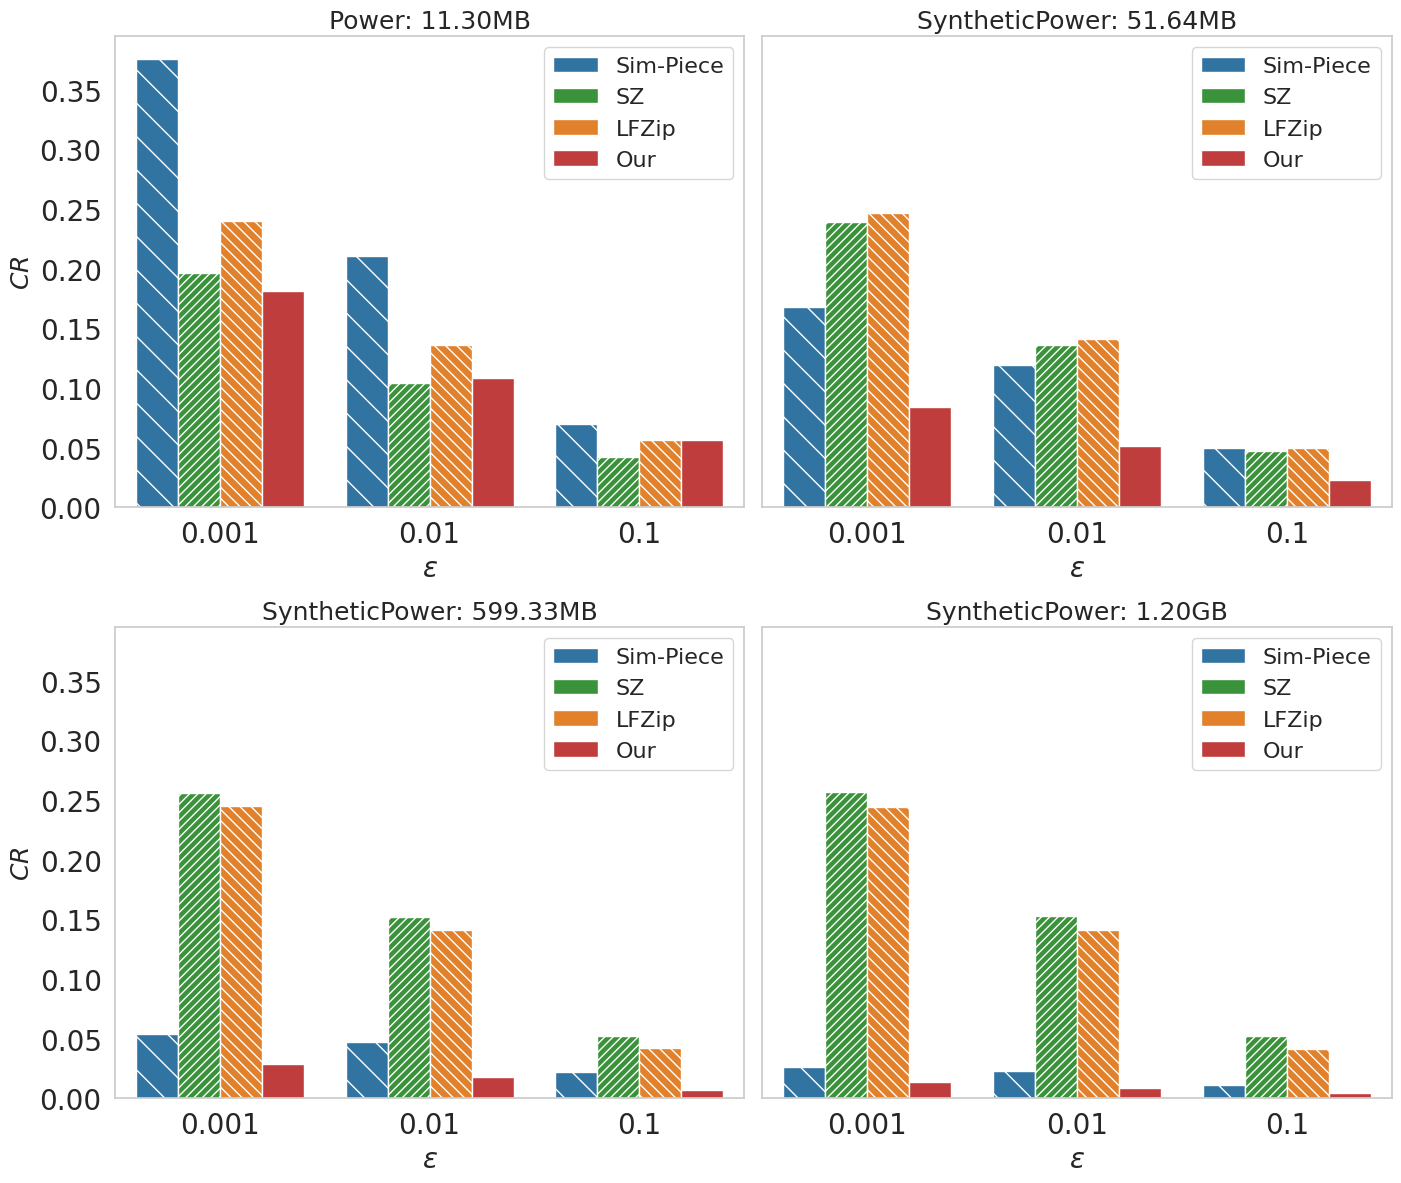

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['Power: 11.30MB', 'SyntheticPower: 51.64MB', 'SyntheticPower: 599.33MB', 'SyntheticPower: 1.20GB']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Power: 11.30MB': [0.070,   0.211 , 0.376],
    'SyntheticPower: 51.64MB': [0.050 , 0.119 , 0.168 ],
    'SyntheticPower: 599.33MB': [ 0.022, 0.047, 0.054],
    'SyntheticPower: 1.20GB': [ 0.011, 0.023, 0.026]
}


SZ_values = {
    'Power: 11.30MB': [0.042,   0.104, 0.196],
    'SyntheticPower: 51.64MB': [0.0468, 0.1363, 0.239	],
    'SyntheticPower: 599.33MB': [ 0.0520, 0.1517, 0.2562],
    'SyntheticPower: 1.20GB': [ 0.0518, 0.1525, 0.2569]
}


LFZip_values = {
    'Power: 11.30MB': [0.056,  0.136,  0.240],
    'SyntheticPower: 51.64MB': [0.0494, 0.1412, 0.2466],
    'SyntheticPower: 599.33MB': [ 0.0424,0.141, 0.245],
    'SyntheticPower: 1.20GB': [ 0.0417, 0.1407, 0.2444]
}

our_values = {
    'Power: 11.30MB': [0.056,  0.108, 0.181],
    'SyntheticPower: 51.64MB': [0.023, 0.051, 0.084],
    'SyntheticPower: 599.33MB': [ 0.007, 0.018, 0.029],
    'SyntheticPower: 1.20GB': [ 0.004, 0.009, 0.014]
}




# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })



# Construct the DataFrame
df = pd.DataFrame(rows)

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=False, sharey=True)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')

method_colors = {'Sim-Piece': color_palette[0], 'SZ': color_palette[2], 'LFZip': color_palette[1], 'Our': color_palette[3]}
method_hatches = {'Sim-Piece': '\\', 'SZ': '////', 'LFZip': '\\\\\\', 'Our': None}  # Use None for no hatching

for i, dataset in enumerate(datasets):
    ax = axes[i]
    barplot = sns.barplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                          hue='Method', palette=method_colors, ax=ax)

    # Iterate over the methods and apply hatching patterns using the hue information
    hatches = iter([method_hatches[method] for method in df['Method'].unique() if method in method_hatches])
    for bars in barplot.containers:
        hatch = next(hatches)
        for bar in bars:
            bar.set_hatch(hatch)

    ax.set_title(dataset, fontsize=18)
    ax.set_xlabel(r'$\epsilon$', fontsize=20)
    ax.set_ylabel(r'$CR$', fontsize=18)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(title='')  # Remove legend title
    axes[i].grid(False)


# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 4):
    fig.delaxes(axes[j])
    
# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=16)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/sizelossy.pdf'
# plt.savefig(pdf_filename, format='pdf')

plt.show()

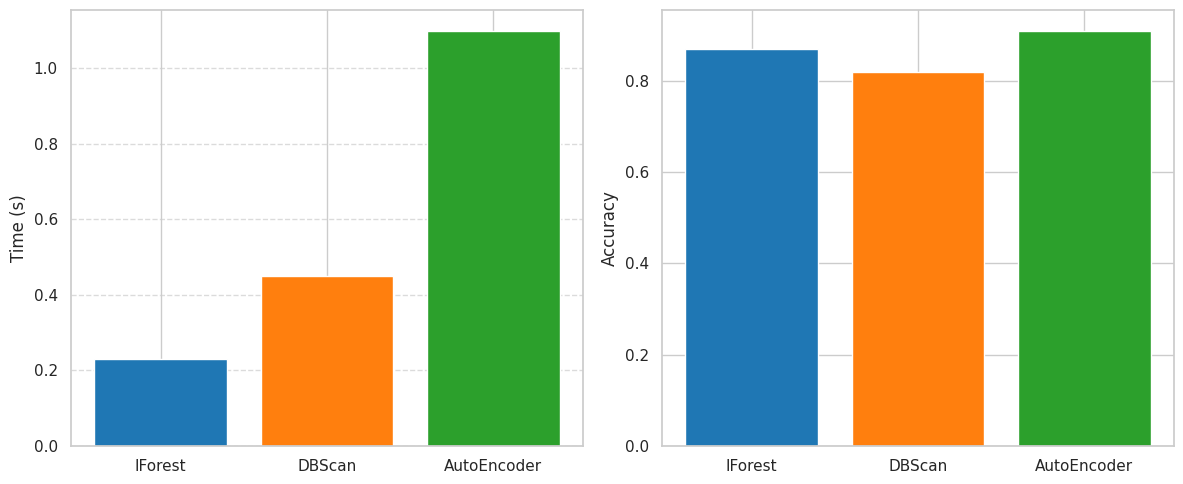

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
methods = ['IForest', 'LOF', 'SAND', 'AutoEncoder']
detection_time = [1.04, 0.28, 35.43, 78.55 ]  # in seconds
AUC-PR = [0.045,  0.049, 0.84, 0.11]       # F1-score or AUC

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create side-by-side bar plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Detection time plot (left)
ax[0].bar(methods, detection_time, color=colors)
# ax[0].set_title('Outlier Detection Time')
ax[0].set_ylabel('Time (s)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Accuracy plot (right)
ax[1].bar(methods, accuracy, color=colors)
# ax[1].set_title('Outlier Detection Accuracy')
ax[1].set_ylabel('Accuracy')
# ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].grid("False")


plt.tight_layout()
plt.show()


In [10]:
import os
import numpy as np
import pandas as pd
import math
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from TSB_UAD.models.feature import Window
from TSB_UAD.utils.slidingWindows import find_length
from TSB_UAD.vus.metrics import get_metrics
from tensorflow.keras.callbacks import EarlyStopping



# 读取数据文件路径
path = "/home/guoyou/OutlierDetection/TSB-UAD/data/SED/sed.out"


# 读取数据
df = pd.read_csv(path, header=None).to_numpy()
data = df[:, 0].astype(float)
label = df[:, 1]


start_time = time.time()
# 设置窗口大小并进行窗口化处理
slidingWindow = find_length(data)
X_data = Window(window=slidingWindow).convert(data).to_numpy()

# 将数据reshape为二维格式
# X_data = data.reshape(-1, 1)

# 归一化数据
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

# 构建AutoEncoder模型
encoding_dim = 14  # 压缩到的维度
input_dim = X_data_scaled.shape[1]

autoencoder = Sequential()
# 编码层
autoencoder.add(Dense(encoding_dim, activation="relu", input_shape=(input_dim,)))
# 解码层
autoencoder.add(Dense(input_dim, activation="sigmoid"))
# autoencoder.add(Dense(input_dim, activation="linear"))


# 编译AutoEncoder
autoencoder.compile(optimizer='adam', loss='mse')

# 定义 EarlyStopping 回调（监控训练损失）
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 训练 AutoEncoder，最多30轮，如早停条件满足则提前停止
autoencoder.fit(
    X_data_scaled, X_data_scaled,
    epochs=30,                     # 保持你的原始设定
    batch_size=32,
    shuffle=True,
    callbacks=[early_stopping],
    verbose=1
)

# 训练AutoEncoder
# autoencoder.fit(X_data_scaled, X_data_scaled, epochs=30, batch_size=32, shuffle=True)

# 使用训练好的AutoEncoder进行重建
X_data_reconstructed = autoencoder.predict(X_data_scaled)

# 计算重建误差
mse = np.mean(np.power(X_data_scaled - X_data_reconstructed, 2), axis=1)

# 使用重建误差来判断异常点
# 假设阈值为误差的平均值加上3倍的标准差
# threshold = np.mean(mse) + 3 * np.std(mse)
threshold = np.percentile(mse, 95)
score = np.where(mse > threshold, 1, 0)
end_time = time.time()
execution_time = round(end_time - start_time, 2)
print(f"Execution Time: {execution_time} s")

# 确保它们具有相同的形状
if len(score) != len(label):
    # 修正 score 或 label 的长度，或找到导致长度不匹配的步骤
    min_length = min(len(score), len(label))
    score = score[:min_length]
    label = label[:min_length]

# 计算并输出评估指标
results = get_metrics(score, label, metric="all")
for metric in results.keys():
    print(metric, ':', results[metric])


2025-04-13 05:13:57.834394: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 05:13:57.836755: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 05:13:57.845760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-13 05:13:57.862080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-13 05:13:57.866726: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 05:13:57.878702: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/30


/home/guoyou/miniconda3/envs/TSB/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744521239.390470  302886 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744521239.390815  302886 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-13 05:13:59.394117: W tensorflow/core/co

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 845us/step - loss: 0.0312
Epoch 2/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 793us/step - loss: 0.0061
Epoch 3/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 791us/step - loss: 0.0055
Epoch 4/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - loss: 0.0053
Epoch 5/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: 0.0052
Epoch 6/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step - loss: 0.0051
Epoch 7/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: 0.0050
Epoch 8/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 756us/step - loss: 0.0049
Epoch 9/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - loss: 0.0049
Epoch 10/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - loss: 0.0048
Epoch 11/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - loss: 0.0048
Epoch 12/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - loss: 0.0048
Epoch 13/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 3s 780us/step - loss: 0.0047
Epoch 14/30
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - loss: 0.0047
Epoch 15/30


### Determin SNR using entropy

In [1]:
import numpy as np
import pandas as pd

def compute_entropy_norm(values, num_bins=64):
    """
    Compute normalised Shannon entropy for a 1D array of values.
    """
    hist, _ = np.histogram(values, bins=num_bins, density=True)
    p = hist / np.sum(hist)
    p = p[p > 0]
    entropy = -np.sum(p * np.log2(p))
    entropy_max = np.log2(num_bins)
    return entropy / entropy_max if entropy_max > 0 else 0

def estimate_snr_from_file(filepath, value_col=0, label_col=1, snr_min=25, snr_max=35, num_bins=64):
    """
    Estimate SNR from a CSV file with value and label columns.

    Parameters
    ----------
    filepath : str
        Path to the CSV file.
    value_col : int or str
        Column index or name for values.
    label_col : int or str
        Column index or name for labels.
    snr_min : float
        Minimum allowed SNR (e.g., 25 dB).
    snr_max : float
        Maximum allowed SNR (e.g., 35 dB).
    num_bins : int
        Number of quantisation bins.

    Returns
    -------
    float
        Estimated SNR in dB.
    """
    df = pd.read_csv(filepath, header=None)
    values = df.iloc[:, value_col].values
    entropy_norm = compute_entropy_norm(values, num_bins)
    snr = snr_min + (snr_max - snr_min) * entropy_norm
    return snr

snr = estimate_snr_from_file("/home/guoyou/OutlierDetection/TSB-UAD/data/SED/sed.out")
print(f"Estimated SNR: {snr:.2f} dB")

Estimated SNR: 28.70 dB


In [47]:
import os
import numpy as np
import pandas as pd
import Package
import sys
sys.path.append('/home/guoyou')
sys.path.append('/home/guoyou/SHRINK')
from SHRINK.Shrink.TimeSeriesReader import TimeSeriesReader
from SHRINK.Shrink.Shrink import Shrink
from SHRINK.Shrink.Point import Point
from SHRINK.Shrink.utilFunction import *
from SHRINK.Shrink.SNRQuantization import *
from SHRINK.Shrink.Transform import Transform
from SHRINK.Shrink.Transform import DeTransform

def compute_entropy_norm(values, num_bins=64):
    """
    Compute normalised Shannon entropy for time series data.
    """
    hist, _ = np.histogram(values, bins=num_bins, density=True)
    p = hist / np.sum(hist)
    p = p[p > 0]
    entropy = -np.sum(p * np.log2(p))
    entropy_max = np.log2(num_bins)
    return entropy / entropy_max if entropy_max > 0 else 0

def estimate_snr_from_file(filepath, value_col=0, label_col=1, snr_min=25, snr_max=35, num_bins=64):
    """
    Estimate SNR from a CSV file with value and label columns.
    """
    df = pd.read_csv(filepath, header=None)
    values = df.iloc[:, value_col].values
    entropy_norm = compute_entropy_norm(values, num_bins)
    # entropy_norm = compute_entropy_norm(values, 1000)
    snr = snr_min + (snr_max - snr_min) * entropy_norm
    return snr

def estimate_snr_from_folder(folder_path, value_col=0, label_col=1, snr_min=25, snr_max=35, num_bins=64):
    """
    Estimate epsilon for each CSV/OUT file in a folder and save only epsilon values to a file.
    """
    compress_folder = os.path.join(folder_path, "Compress")
    # os.makedirs(compress_folder, exist_ok=True)

    output_file = os.path.join(compress_folder, "epsilon.txt")
    epsilon_list = []

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".csv") or filename.endswith(".out"):
            filepath = os.path.join(folder_path, filename)
            try:
                snr = estimate_snr_from_file(filepath, value_col, label_col, snr_min, snr_max, num_bins)
                print(f"{filename}: SNR_calculate = {snr}, ", end=" ")
                df = pd.read_csv(filepath, header=None).dropna().to_numpy()
                data = df[:, 0].astype(float)

                encoder = TimeSeriesEncoder(default_snr=int(snr), max_window=3000)
                epsilon, snr_actual, _, window = encoder.encode(data, snr=snr, estimate_window=True)

                print(f"epsilon = {epsilon:.6f}, SNR = {snr_actual}")

                epsilon_list.append(epsilon)

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # 保存 epsilon 列表，每行一个值
    if epsilon_list:
        with open(output_file, 'w') as f:
            for eps in epsilon_list:
                f.write(f"{eps}\n")
        print(f"Saved epsilon values to {output_file}")

if __name__ == "__main__":
    pathList = [
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/SED/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/Genesis/" ,
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/ECG/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/MGAB/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/SensorScope/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/MITDB/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/Daphnet/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/IOPS/",
                    "/home/guoyou/OutlierDetection/TSB-UAD/data/synthetic/",
                    # "/home/guoyou/OutlierDetection/TSB-UAD/data/synthetic/MoteStrain/",
                ]
    for pth in pathList:
    # Example usage:
    # folder_path = "/home/guoyou/OutlierDetection/TSB-UAD/data/SED/"
        print(pth.strip("/").split("/")[-1])
        estimate_snr_from_folder(pth, snr_min=25)
        print("")



SED
sed.out: SNR_calculate = 28.703684444359254,  epsilon = 32.000000, SNR = 29.646395352676155
Saved epsilon values to /home/guoyou/OutlierDetection/TSB-UAD/data/SED/Compress/epsilon.txt

Genesis
genesis-anomalies.test.csv@1.out: SNR_calculate = 33.21071309093084,  epsilon = 16.000000, SNR = 38.727283549518
genesis-anomalies.test.csv@13.out: SNR_calculate = 26.03321686449074,  epsilon = 0.500000, SNR = inf
genesis-anomalies.test.csv@17.out: SNR_calculate = 26.665459157207824,  epsilon = 0.500000, SNR = inf
genesis-anomalies.test.csv@3.out: SNR_calculate = 29.71604971213921,  epsilon = 8192.000000, SNR = 30.92114561261723
genesis-anomalies.test.csv@5.out: SNR_calculate = 33.17905359852563,  epsilon = 4.000000, SNR = 37.25169517385914
genesis-anomalies.test.csv@6.out: SNR_calculate = 25.571441912614993,  epsilon = 0.500000, SNR = inf
Saved epsilon values to /home/guoyou/OutlierDetection/TSB-UAD/data/Genesis/Compress/epsilon.txt

ECG
MBA_ECG14046_data_0.out: SNR_calculate = 29.2096574288

### Data characteristics

In [1]:
import os
import pandas as pd

folder_path = "/home/guoyou/OutlierDetection/TSB-UAD/data/ECG/" 

total_lengths = []
total_abnormal_counts = []
total_percentages = []

for filename in os.listdir(folder_path):
    if filename.endswith(".out"):  # 只处理 .out 文件
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, header=None)

        length = len(df)
        abnormal_count = df[1].sum()
        percentage = abnormal_count / length * 100

        total_lengths.append(length)
        total_abnormal_counts.append(abnormal_count)
        total_percentages.append(percentage)

# 计算平均值
avg_length = sum(total_lengths) / len(total_lengths)
avg_abnormal = sum(total_abnormal_counts) / len(total_abnormal_counts)
avg_percentage = sum(total_percentages) / len(total_percentages)

# 输出结果
print(f"Avg. Length: {avg_length:.2f}")
print(f"Avg. Abnormal Points: {avg_abnormal:.2f}")
print(f"Avg. Percentage: {avg_percentage:.2f}%")


Avg. Length: 240185.56
Avg. Abnormal Points: 41773.67
Avg. Percentage: 16.02%


In [1]:
import os
import pandas as pd

folder_path = "/home/guoyou/OutlierDetection/TSB-UAD/data/synthetic/" 

total_lengths = []
total_abnormal_counts = []
total_percentages = []

for filename in os.listdir(folder_path):
    if filename.endswith(".out"):  # 只处理 .out 文件
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, header=None)

        length = len(df)
        abnormal_count = df[1].sum()
        percentage = abnormal_count / length * 100

        total_lengths.append(length)
        total_abnormal_counts.append(abnormal_count)
        total_percentages.append(percentage)

# 计算平均值
avg_length = sum(total_lengths) / len(total_lengths)
avg_abnormal = sum(total_abnormal_counts) / len(total_abnormal_counts)
avg_percentage = sum(total_percentages) / len(total_percentages)

# 输出结果
print(f"Avg. Length: {avg_length:.2f}")
print(f"Avg. Abnormal Points: {avg_abnormal:.2f}")
print(f"Avg. Percentage: {avg_percentage:.2f}%")


Avg. Length: 2238517.56
Avg. Abnormal Points: 4035.33
Avg. Percentage: 0.21%


### Uncertainty

/tmp/ipykernel_75443/711698345.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(sub["AUC"], sub["Uncertainty"],


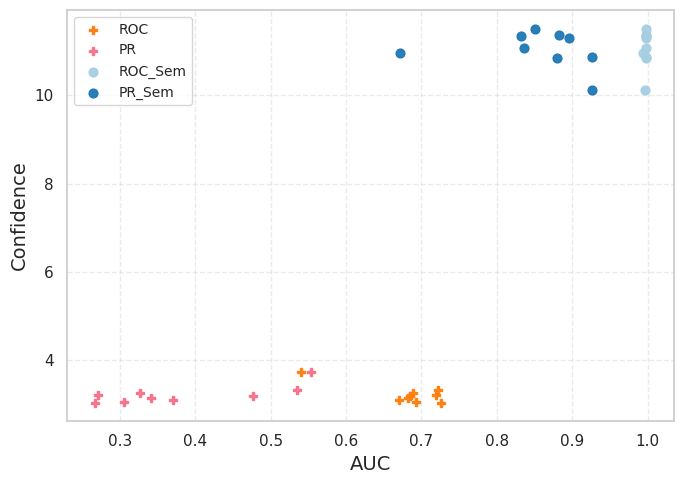

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")


Epistemics_ori = [3.7343563501563017, 3.2442117048882304, 3.0934438345138693, 3.0612086123405358, 3.3306022296899895, 
                3.1817500080213885, 3.1430257096735423, 3.2113841964147998, 3.0373267531505936]
AUC_ori =  [0.54033, 0.68897, 0.66975, 0.6925, 0.72169, 0.68519, 0.68195, 0.71893, 0.72581]
AUC_pr_ori  =  [0.55365, 0.32608, 0.36976, 0.30513, 0.53551, 0.4763, 0.34112, 0.27069, 0.26623]
    

Epistemics_comp = [10.12188061611142, 11.07868601840702, 10.954132062539493, 11.36433325884084, 10.879125215559924, 
                10.852298941847229, 11.302467310905472, 11.351157025632492, 11.513272992824215]
AUC_comp =  [0.99644, 0.99764, 0.99381, 0.99831, 0.99855, 0.99796, 0.99817, 0.99826, 0.99795]
AUC_pr_comp =  [0.92621, 0.8359, 0.67093, 0.88313, 0.92613, 0.8805, 0.89518, 0.83155, 0.85021]


# 构建 DataFrame
df = pd.DataFrame({
    "AUC":  AUC_ori + AUC_comp + AUC_pr_ori + AUC_pr_comp,
    "Uncertainty": Epistemics_ori + Epistemics_comp + Epistemics_ori + Epistemics_comp,
    "Type": ['ROC'] * 9 + ['ROC_Sem'] * 9 + ['PR'] * 9 + ['PR_Sem'] * 9
})

# 使用自定义 color palette
palette = sns.color_palette("Paired")  
palette2 = sns.color_palette("husl", 8)
# palette = [palette[5], palette[4], palette[1], palette[2]]
palettes = {
    "ROC": "#ff7f0e", #palette2[1],
    "PR": palette2[0],
    "ROC_Sem": palette[0],
    "PR_Sem": palette[1]
}
markers = {
    "ROC": "P",
    "PR": "P",
    "ROC_Sem": "o",
    "PR_Sem": "o"
}

plt.figure(figsize=(7, 5))
for t in df["Type"].unique():
    sub = df[df["Type"] == t]
    plt.scatter(sub["AUC"], sub["Uncertainty"], 
                c=palettes[t], marker=markers[t], s=40,
                label=t, alpha=0.95)

plt.xlabel("AUC", fontsize=14)
plt.ylabel("Confidence", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# 获取当前handles和labels
handles, labels = plt.gca().get_legend_handles_labels()
# 按照你想要的顺序重排
order = ["ROC", "PR", "ROC_Sem", "PR_Sem"]
ordered_handles = [handles[labels.index(x)] for x in order]
ordered_labels = order
plt.legend( ordered_handles, ordered_labels, fontsize=10, frameon=True, fancybox=True)
# plt.legend(fontsize=10, frameon=True, fancybox=True)
plt.tight_layout()
# Save the plot as a PDF file
pdf_filename = '/home/guoyou/confidence.pdf'
plt.savefig(pdf_filename, format='pdf')
plt.show()



/tmp/ipykernel_86672/4039218473.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(sub["AUC"], sub["Uncertainty"],


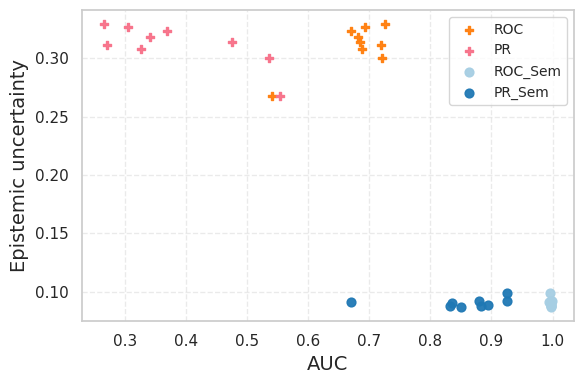

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")


Epistemics_ori = [3.7343563501563017, 3.2442117048882304, 3.0934438345138693, 3.0612086123405358, 3.3306022296899895, 
                3.1817500080213885, 3.1430257096735423, 3.2113841964147998, 3.0373267531505936]
Epistemics_ori = [1/x for x in Epistemics_ori]
AUC_ori =  [0.54033, 0.68897, 0.66975, 0.6925, 0.72169, 0.68519, 0.68195, 0.71893, 0.72581]
AUC_pr_ori  =  [0.55365, 0.32608, 0.36976, 0.30513, 0.53551, 0.4763, 0.34112, 0.27069, 0.26623]
    

Epistemics_comp = [10.12188061611142, 11.07868601840702, 10.954132062539493, 11.36433325884084, 10.879125215559924, 
                10.852298941847229, 11.302467310905472, 11.351157025632492, 11.513272992824215]
Epistemics_comp = [1/x for x in Epistemics_comp]
AUC_comp =  [0.99644, 0.99764, 0.99381, 0.99831, 0.99855, 0.99796, 0.99817, 0.99826, 0.99795]
AUC_pr_comp =  [0.92621, 0.8359, 0.67093, 0.88313, 0.92613, 0.8805, 0.89518, 0.83155, 0.85021]


# 构建 DataFrame
df = pd.DataFrame({
    "AUC":  AUC_ori + AUC_comp + AUC_pr_ori + AUC_pr_comp,
    "Uncertainty": Epistemics_ori + Epistemics_comp + Epistemics_ori + Epistemics_comp,
    "Type": ['ROC'] * 9 + ['ROC_Sem'] * 9 + ['PR'] * 9 + ['PR_Sem'] * 9
})

# 使用自定义 color palette
palette = sns.color_palette("Paired")  
palette2 = sns.color_palette("husl", 8)
# palette = [palette[5], palette[4], palette[1], palette[2]]
palettes = {
    "ROC": "#ff7f0e", #palette2[1],
    "PR": palette2[0],
    "ROC_Sem": palette[0],
    "PR_Sem": palette[1]
}
markers = {
    "ROC": "P",
    "PR": "P",
    "ROC_Sem": "o",
    "PR_Sem": "o"
}

plt.figure(figsize=(6, 4))
for t in df["Type"].unique():
    sub = df[df["Type"] == t]
    plt.scatter(sub["AUC"], sub["Uncertainty"], 
                c=palettes[t], marker=markers[t], s=40,
                label=t, alpha=0.95)

plt.xlabel("AUC", fontsize=14)
plt.ylabel("Epistemic uncertainty", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# 获取当前handles和labels
handles, labels = plt.gca().get_legend_handles_labels()
# 按照你想要的顺序重排
order = ["ROC", "PR", "ROC_Sem", "PR_Sem"]
ordered_handles = [handles[labels.index(x)] for x in order]
ordered_labels = order
plt.legend( ordered_handles, ordered_labels, fontsize=10, frameon=True, fancybox=True)
# plt.legend(fontsize=10, frameon=True, fancybox=True)
plt.tight_layout()
# Save the plot as a PDF file
pdf_filename = '/home/guoyou/confidence.pdf'
plt.savefig(pdf_filename, format='pdf')
plt.show()

